In [1]:
cd F:\PROJECTS\PROJECT_MONKEY SC-RNA SEQ\WORKPLACE\R\

F:\PROJECTS\PROJECT_MONKEY SC-RNA SEQ\WORKPLACE\R


G:\Miniconda3\envs\scvi-env\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 600, vector_friendly = True, format = 'pdf')
palette = ['#fbbc04', '#199de5', '#cfe6d5']

In [3]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)

In [4]:
import os
import tempfile
import scanpy as sc
import scvi
import seaborn as sns
import torch

In [5]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.1.2


In [6]:
# Load dataset we want to transfer label to
adata_to = sc.read("scvi_macaque_cell-type_final.h5ad")
print("adata_to dims: {}".format(adata_to.shape)) 

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


adata_to dims: (36701, 15315)


In [7]:
adata_mouse=sc.read('mouse_p25_scvi.h5ad')

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [8]:
# mouse gene id transfer into human gene id
from mousipy import translate
adata_from2=adata_mouse.copy()
adata_mouse2 = translate(adata_from2)

100%|███████████████████████████████████████| 32285/32285 [01:06<00:00, 485.25it/s]


Found direct orthologs for 16841 genes.
Found multiple orthologs for 775 genes.
Found no orthologs for 12370 genes.
Found no index in biomart for 2299 genes.


100%|████████████████████████████████████████████| 775/775 [00:15<00:00, 51.33it/s]
G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
adata_mouse2

AnnData object with n_obs × n_vars = 6017 × 19593
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'original_gene_symbol'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

In [10]:
adata_to.obs['cell_type'].value_counts()

Fb                       7912
Ms                       4173
CC_ISC_OSC               3203
Bs                       3095
TBC                      2875
Schwann.Cells            2800
Sp/Rt                    2379
IDC                      2105
Is                       1885
IBC_IPh_HeC              1581
Endo.Cells               1412
macrophages               888
TypeI_SGN                 871
DC_PC                     847
HC                        259
SMC                       136
Satellite.glial.cells     112
TypeII_SGN                 84
pericytes                  84
Name: cell_type, dtype: int64

In [11]:
adata_to

AnnData object with n_obs × n_vars = 36701 × 15315
    obs: 'CellID', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_Mt', 'pct_counts_Mt', 'total_counts_MT', 'pct_counts_MT', 'total_counts_HB', 'pct_counts_HB', 'total_counts_Hb', 'pct_counts_Hb', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'batch', 'age', 'cluster3', 'cell_type', 'n_counts', 'leiden_res2', 'leiden_res5', 'cluster4', 'region'
    var: 'gene_ids', 'feature_types', 'Gene', 'genome-0', 'n_cells-0', 'm-0', 'v-0', 'n_obs-0', 'res-0', 'lp-0', 'lpa-0', 'qv-0', 'highly_variable-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'Mt-0', 'MT-0', 'HB-0', 'Hb-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'genome-1', 'n_cells-1', 'm-1', 'v-1', 'n_obs-1', 'res-1', 'lp-1', 'lpa-1', 'qv-1', 'highly_variable-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'MT-1', 'Hb-1', 'mean

In [12]:
#extract cochear epithelium from macaque dataset
include_clusters = ['CC_ISC_OSC','TBC','IDC','IBC_IPh_HeC','DC_PC','HC']
adata_macaque= adata_to[adata_to.obs['cell_type'].isin(include_clusters), :]
adata_macaque

View of AnnData object with n_obs × n_vars = 10870 × 15315
    obs: 'CellID', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_Mt', 'pct_counts_Mt', 'total_counts_MT', 'pct_counts_MT', 'total_counts_HB', 'pct_counts_HB', 'total_counts_Hb', 'pct_counts_Hb', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'batch', 'age', 'cluster3', 'cell_type', 'n_counts', 'leiden_res2', 'leiden_res5', 'cluster4', 'region'
    var: 'gene_ids', 'feature_types', 'Gene', 'genome-0', 'n_cells-0', 'm-0', 'v-0', 'n_obs-0', 'res-0', 'lp-0', 'lpa-0', 'qv-0', 'highly_variable-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'Mt-0', 'MT-0', 'HB-0', 'Hb-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'genome-1', 'n_cells-1', 'm-1', 'v-1', 'n_obs-1', 'res-1', 'lp-1', 'lpa-1', 'qv-1', 'highly_variable-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'MT-1', 'Hb-1

In [13]:
adata_macaque_coe=adata_macaque
adata_macaque_coe

View of AnnData object with n_obs × n_vars = 10870 × 15315
    obs: 'CellID', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_Mt', 'pct_counts_Mt', 'total_counts_MT', 'pct_counts_MT', 'total_counts_HB', 'pct_counts_HB', 'total_counts_Hb', 'pct_counts_Hb', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'batch', 'age', 'cluster3', 'cell_type', 'n_counts', 'leiden_res2', 'leiden_res5', 'cluster4', 'region'
    var: 'gene_ids', 'feature_types', 'Gene', 'genome-0', 'n_cells-0', 'm-0', 'v-0', 'n_obs-0', 'res-0', 'lp-0', 'lpa-0', 'qv-0', 'highly_variable-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'Mt-0', 'MT-0', 'HB-0', 'Hb-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'genome-1', 'n_cells-1', 'm-1', 'v-1', 'n_obs-1', 'res-1', 'lp-1', 'lpa-1', 'qv-1', 'highly_variable-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'MT-1', 'Hb-1

In [14]:
adata_mouse2.obs['cell_type'].value_counts()

Bs               1365
Ms                934
CC_ISC_OSC        455
TypeI_SGN         424
RM                353
TBC               339
Is                333
Fb                250
TypeII_SGN        250
pericytes         188
OB                182
DC                174
OHC               165
Schwann.Cells     125
PC                119
IBC_IPh_HeC       112
Sp/Rt             102
IDC                87
IHC                60
Name: cell_type, dtype: int64

In [15]:
#extract cochear epithelium from mouse dataset
include_clusters = ['CC_ISC_OSC','TBC','IDC','IBC_IPh_HeC','DC','PC','OHC','IHC']
adata_mouse_coe= adata_mouse2[adata_mouse2.obs['cell_type'].isin(include_clusters), :]
adata_mouse_coe

View of AnnData object with n_obs × n_vars = 1511 × 19593
    obs: 'CellID', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'cell_type', 'cluster5'
    var: 'gene_ids', 'feature_types', 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'original_gene_symbol'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster2_colors', 'leiden', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

In [16]:
adata_macaque_coe.obs['batch']=adata_macaque_coe.obs['age']

C:\Users\Dell\AppData\Local\Temp\ipykernel_17224\818069290.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_macaque_coe.obs['batch']=adata_macaque_coe.obs['age']


In [17]:
adata_macaque_coe.obs['batch'].value_counts()

5-year-old     9640
1-year-old      687
11-year-old     543
Name: batch, dtype: int64

In [18]:
adata_macaque_coe.obs['species']='macaque'

In [19]:
adata_mouse_coe.obs['species']='mouse'

C:\Users\Dell\AppData\Local\Temp\ipykernel_17224\3742835989.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_mouse_coe.obs['species']='mouse'


In [20]:
adata_mouse_coe.obs['cell_type'].value_counts()

CC_ISC_OSC     455
TBC            339
DC             174
OHC            165
PC             119
IBC_IPh_HeC    112
IDC             87
IHC             60
Name: cell_type, dtype: int64

In [21]:
cluster_annotation = {
    'CC_ISC_OSC': 'CC_ISC_OSC',
    'TBC': 'TBC',
    'DC': 'DC_PC',
    'PC': 'DC_PC',
    'OHC': 'HC',
    'IBC_IPh_HeC': 'IBC_IPh_HeC',
    'IDC': 'IDC',
    'IHC': 'HC',

}
adata_mouse_coe.obs['cell_type'] = adata_mouse_coe.obs['cell_type'].map(cluster_annotation).astype('category')

In [22]:
adata_mouse_coe.obs['cell_type'].value_counts()

CC_ISC_OSC     455
TBC            339
DC_PC          293
HC             225
IBC_IPh_HeC    112
IDC             87
Name: cell_type, dtype: int64

In [23]:
small_marker_dict={'Sp/Rt':['SLC26A4','ANXA1'],
                  'Bs':['CLDN11','ATP6V0A4','TJP1'], 
'Ms':['KCNE1','ESRRB','DCLK1'],
'Pan_SC':['OTOG','OTOGL','USH1C','GATA3'],
  'IBC_IPh_HeC':['S100A1','SLC1A3','APQ4'],   
      'DC':['LGR5','FGFR3','PROX1','CEACAM16'],
    'PC' :['SMPX','LGR6','ENAH'],
            'IDC':['OTOA'],       
    'CC_ISC_OSC':['APOE','EPYC'],
       'macrophages':['AIF1','CD163'], 
                   'Endo.Cells':['VWF','ESAM'],
                   'Is':['MLANA','TYR','DCT'],
    'Schwann.Cells':['MPZ','PRX'],
                   'Satellite.glial.cells':['MAG','MOG','MOBP'],
      'TypeI_SGN' :['SNAP25','NEFL','PVALB','CALB2'],
    'TypeII_SGN':['PRPH','ANO2'],  
      'HC':['TMC1','MYO7A','SLC26A5','OTOF','SLC17A8','CALB1'],
    'pericytes':['RGS5'],
   'SMC': ["TAGLN"],   
      'TBC':['EMILIN2','NOTUM','RARRES1'],
 'Fb':['OTOS','COL9A2','SLC13A3','SLC7A11','SLC12A2','BMP6','SLC7A11','SLC26A7'],     
}
# check if the markers are in the data
smarker_genes_in_data = dict()
for ct, markers in small_marker_dict.items():
    markers_found = list()
    for marker in markers:
        if marker in adata_mouse_coe.var.index:
            markers_found.append(marker)
    smarker_genes_in_data[ct] = markers_found
#del [] # remove the last marker
del_markers = list()
for ct, markers in smarker_genes_in_data.items():
    if markers==[]:
        del_markers.append(ct)
for ct in del_markers:
    del smarker_genes_in_data[ct]

categories: CC_ISC_OSC, DC_PC, HC, etc.
var_group_labels: Sp/Rt, Bs, Ms, etc.


G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


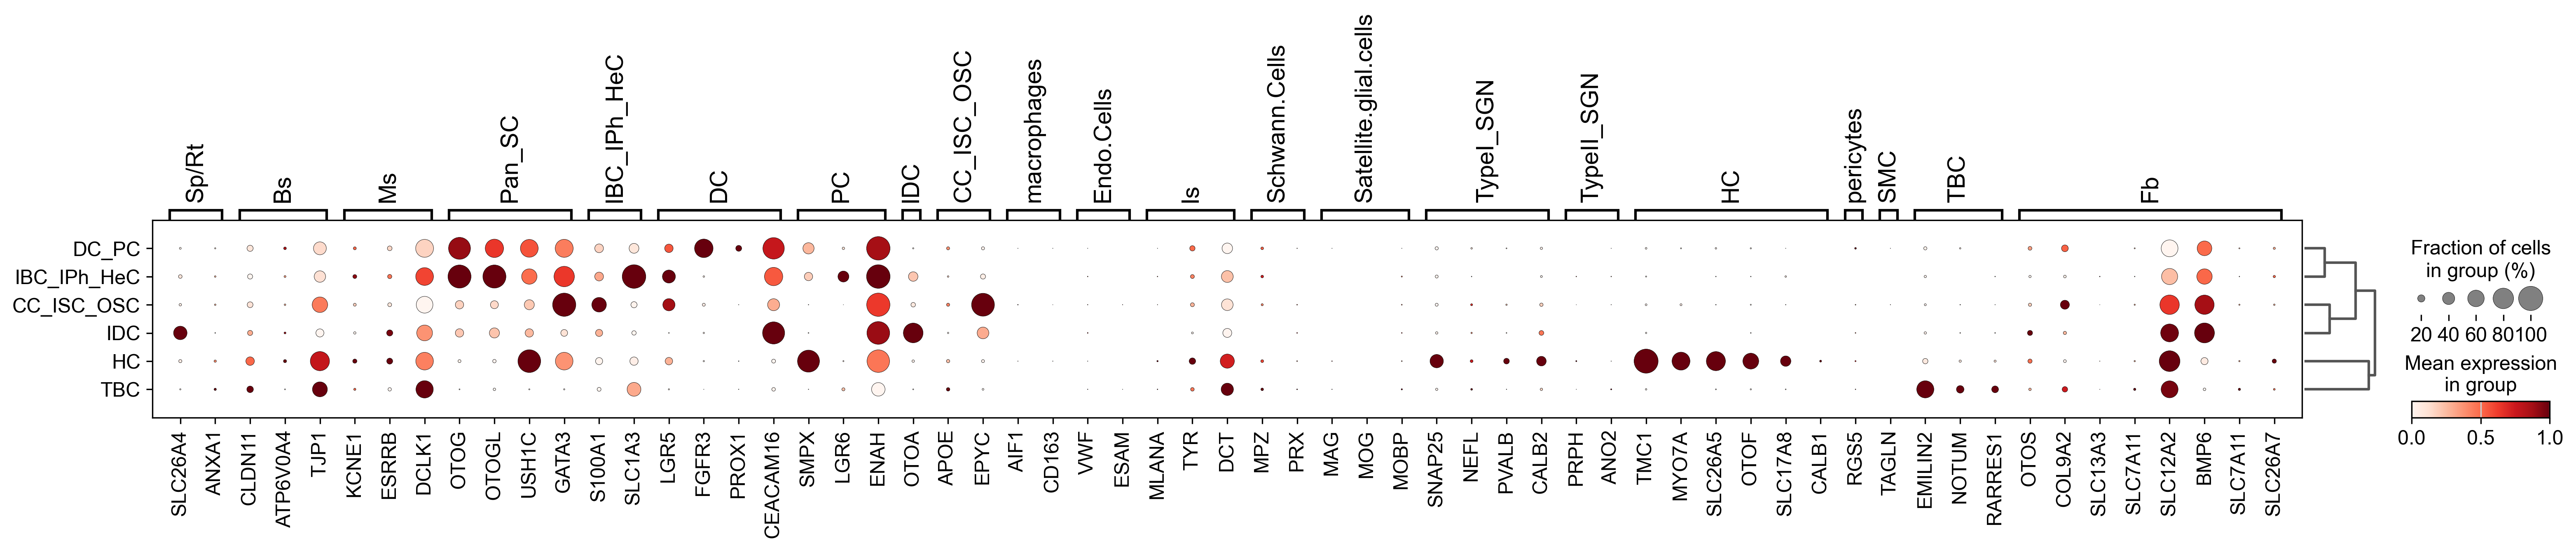

In [24]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.dotplot(
    adata_mouse_coe,
    groupby="cell_type",
    var_names=smarker_genes_in_data,
   dendrogram=True,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

In [102]:
# convert object to seurat for cross-species analysis
adata_mouse_coe.write_loom('mouse_coe_all.loom',write_obsm_varm=True)
adata_mouse_coe.obs.to_csv('mouse_coe_all_obs.csv')
adata_mouse_coe.var.to_csv('mouse_coe_all_var.csv')

In [66]:
adata = anndata.concat([adata_macaque_coe, adata_mouse_coe])
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="species",
    subset=True,
)

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [67]:
adata

AnnData object with n_obs × n_vars = 12381 × 2000
    obs: 'CellID', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'batch', 'cell_type', 'species'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

In [68]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [69]:
scvi_model = scvi.model.SCVI(adata, n_layers=2, n_latent=30)

In [70]:
scvi_model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
G:\Miniconda3\envs\scvi-env\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.


Epoch 1/400:   0%|                                            | 0/400 [00:00<?, ?it/s]

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/400:   0%| | 1/400 [00:02<14:09,  2.13s/it, v_num=1, train_loss_step=734, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/400:   0%| | 2/400 [00:04<14:39,  2.21s/it, v_num=1, train_loss_step=717, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/400:   1%| | 3/400 [00:06<14:05,  2.13s/it, v_num=1, train_loss_step=739, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/400:   1%| | 4/400 [00:08<14:04,  2.13s/it, v_num=1, train_loss_step=700, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 6/400:   1%| | 5/400 [00:10<14:10,  2.15s/it, v_num=1, train_loss_step=721, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 7/400:   2%| | 6/400 [00:13<14:38,  2.23s/it, v_num=1, train_loss_step=690, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 8/400:   2%| | 7/400 [00:15<14:38,  2.24s/it, v_num=1, train_loss_step=662, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 9/400:   2%| | 8/400 [00:17<14:19,  2.19s/it, v_num=1, train_loss_step=705, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 10/400:   2%| | 9/400 [00:19<14:13,  2.18s/it, v_num=1, train_loss_step=670, tra

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 11/400:   2%| | 10/400 [00:21<14:11,  2.18s/it, v_num=1, train_loss_step=648, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 12/400:   3%| | 11/400 [00:23<13:59,  2.16s/it, v_num=1, train_loss_step=705, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 13/400:   3%| | 12/400 [00:26<14:18,  2.21s/it, v_num=1, train_loss_step=706, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 14/400:   3%| | 13/400 [00:28<14:51,  2.30s/it, v_num=1, train_loss_step=694, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 15/400:   4%| | 14/400 [00:30<14:33,  2.26s/it, v_num=1, train_loss_step=637, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 16/400:   4%| | 15/400 [00:33<15:01,  2.34s/it, v_num=1, train_loss_step=662, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 17/400:   4%| | 16/400 [00:35<14:37,  2.28s/it, v_num=1, train_loss_step=681, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 18/400:   4%| | 17/400 [00:37<14:16,  2.24s/it, v_num=1, train_loss_step=630, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 19/400:   4%| | 18/400 [00:39<13:54,  2.18s/it, v_num=1, train_loss_step=660, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 20/400:   5%| | 19/400 [00:41<13:36,  2.14s/it, v_num=1, train_loss_step=713, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 21/400:   5%| | 20/400 [00:43<13:22,  2.11s/it, v_num=1, train_loss_step=678, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 22/400:   5%| | 21/400 [00:46<13:22,  2.12s/it, v_num=1, train_loss_step=686, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 23/400:   6%| | 22/400 [00:48<13:35,  2.16s/it, v_num=1, train_loss_step=727, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 24/400:   6%| | 23/400 [00:50<13:28,  2.14s/it, v_num=1, train_loss_step=634, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 25/400:   6%| | 24/400 [00:52<13:16,  2.12s/it, v_num=1, train_loss_step=662, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 26/400:   6%| | 25/400 [00:54<13:06,  2.10s/it, v_num=1, train_loss_step=699, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 27/400:   6%| | 26/400 [00:56<13:14,  2.12s/it, v_num=1, train_loss_step=702, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 28/400:   7%| | 27/400 [00:58<13:28,  2.17s/it, v_num=1, train_loss_step=742, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 29/400:   7%| | 28/400 [01:01<13:21,  2.16s/it, v_num=1, train_loss_step=663, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 30/400:   7%| | 29/400 [01:03<13:25,  2.17s/it, v_num=1, train_loss_step=659, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 31/400:   8%| | 30/400 [01:05<13:14,  2.15s/it, v_num=1, train_loss_step=648, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 32/400:   8%| | 31/400 [01:07<13:03,  2.12s/it, v_num=1, train_loss_step=690, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 33/400:   8%| | 32/400 [01:09<12:52,  2.10s/it, v_num=1, train_loss_step=665, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 34/400:   8%| | 33/400 [01:11<12:54,  2.11s/it, v_num=1, train_loss_step=645, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 35/400:   8%| | 34/400 [01:13<12:47,  2.10s/it, v_num=1, train_loss_step=599, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 36/400:   9%| | 35/400 [01:15<12:42,  2.09s/it, v_num=1, train_loss_step=633, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 37/400:   9%| | 36/400 [01:17<12:36,  2.08s/it, v_num=1, train_loss_step=679, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 38/400:   9%| | 37/400 [01:19<12:31,  2.07s/it, v_num=1, train_loss_step=720, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 39/400:  10%| | 38/400 [01:21<12:30,  2.07s/it, v_num=1, train_loss_step=700, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 40/400:  10%| | 39/400 [01:24<12:26,  2.07s/it, v_num=1, train_loss_step=673, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 41/400:  10%| | 40/400 [01:26<12:28,  2.08s/it, v_num=1, train_loss_step=710, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 42/400:  10%| | 41/400 [01:28<12:29,  2.09s/it, v_num=1, train_loss_step=636, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 43/400:  10%| | 42/400 [01:30<12:27,  2.09s/it, v_num=1, train_loss_step=668, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 44/400:  11%| | 43/400 [01:32<12:26,  2.09s/it, v_num=1, train_loss_step=648, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 45/400:  11%| | 44/400 [01:34<12:37,  2.13s/it, v_num=1, train_loss_step=666, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 46/400:  11%| | 45/400 [01:36<12:34,  2.12s/it, v_num=1, train_loss_step=700, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 47/400:  12%| | 46/400 [01:38<12:41,  2.15s/it, v_num=1, train_loss_step=650, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 48/400:  12%| | 47/400 [01:41<12:30,  2.13s/it, v_num=1, train_loss_step=675, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 49/400:  12%| | 48/400 [01:43<12:22,  2.11s/it, v_num=1, train_loss_step=748, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 50/400:  12%| | 49/400 [01:45<12:13,  2.09s/it, v_num=1, train_loss_step=725, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 51/400:  12%|▏| 50/400 [01:47<12:08,  2.08s/it, v_num=1, train_loss_step=739, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 52/400:  13%|▏| 51/400 [01:49<12:14,  2.10s/it, v_num=1, train_loss_step=644, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 53/400:  13%|▏| 52/400 [01:51<12:11,  2.10s/it, v_num=1, train_loss_step=649, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 54/400:  13%|▏| 53/400 [01:53<12:05,  2.09s/it, v_num=1, train_loss_step=632, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 55/400:  14%|▏| 54/400 [01:55<12:08,  2.11s/it, v_num=1, train_loss_step=663, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 56/400:  14%|▏| 55/400 [01:57<12:15,  2.13s/it, v_num=1, train_loss_step=747, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 57/400:  14%|▏| 56/400 [01:59<12:05,  2.11s/it, v_num=1, train_loss_step=683, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 58/400:  14%|▏| 57/400 [02:02<12:10,  2.13s/it, v_num=1, train_loss_step=608, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 59/400:  14%|▏| 58/400 [02:04<12:03,  2.11s/it, v_num=1, train_loss_step=650, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 60/400:  15%|▏| 59/400 [02:06<11:57,  2.10s/it, v_num=1, train_loss_step=661, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 61/400:  15%|▏| 60/400 [02:08<11:57,  2.11s/it, v_num=1, train_loss_step=673, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 62/400:  15%|▏| 61/400 [02:10<12:18,  2.18s/it, v_num=1, train_loss_step=695, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 63/400:  16%|▏| 62/400 [02:12<12:12,  2.17s/it, v_num=1, train_loss_step=664, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 64/400:  16%|▏| 63/400 [02:14<12:05,  2.15s/it, v_num=1, train_loss_step=774, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 65/400:  16%|▏| 64/400 [02:17<12:05,  2.16s/it, v_num=1, train_loss_step=693, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 66/400:  16%|▏| 65/400 [02:19<11:53,  2.13s/it, v_num=1, train_loss_step=647, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 67/400:  16%|▏| 66/400 [02:21<11:44,  2.11s/it, v_num=1, train_loss_step=681, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 68/400:  17%|▏| 67/400 [02:23<11:47,  2.12s/it, v_num=1, train_loss_step=699, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 69/400:  17%|▏| 68/400 [02:25<11:40,  2.11s/it, v_num=1, train_loss_step=578, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 70/400:  17%|▏| 69/400 [02:27<11:35,  2.10s/it, v_num=1, train_loss_step=655, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 71/400:  18%|▏| 70/400 [02:29<11:32,  2.10s/it, v_num=1, train_loss_step=655, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 72/400:  18%|▏| 71/400 [02:31<11:27,  2.09s/it, v_num=1, train_loss_step=652, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 73/400:  18%|▏| 72/400 [02:33<11:22,  2.08s/it, v_num=1, train_loss_step=662, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 74/400:  18%|▏| 73/400 [02:35<11:20,  2.08s/it, v_num=1, train_loss_step=672, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 75/400:  18%|▏| 74/400 [02:37<11:21,  2.09s/it, v_num=1, train_loss_step=684, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 76/400:  19%|▏| 75/400 [02:40<11:26,  2.11s/it, v_num=1, train_loss_step=666, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 77/400:  19%|▏| 76/400 [02:42<11:23,  2.11s/it, v_num=1, train_loss_step=651, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 78/400:  19%|▏| 77/400 [02:44<11:20,  2.11s/it, v_num=1, train_loss_step=727, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 79/400:  20%|▏| 78/400 [02:46<11:31,  2.15s/it, v_num=1, train_loss_step=644, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 80/400:  20%|▏| 79/400 [02:48<11:28,  2.14s/it, v_num=1, train_loss_step=626, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 81/400:  20%|▏| 80/400 [02:50<11:33,  2.17s/it, v_num=1, train_loss_step=602, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 82/400:  20%|▏| 81/400 [02:53<12:13,  2.30s/it, v_num=1, train_loss_step=745, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 83/400:  20%|▏| 82/400 [02:55<12:23,  2.34s/it, v_num=1, train_loss_step=672, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 84/400:  21%|▏| 83/400 [02:58<12:08,  2.30s/it, v_num=1, train_loss_step=704, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 85/400:  21%|▏| 84/400 [03:00<11:48,  2.24s/it, v_num=1, train_loss_step=735, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 86/400:  21%|▏| 85/400 [03:02<11:32,  2.20s/it, v_num=1, train_loss_step=647, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 87/400:  22%|▏| 86/400 [03:04<11:17,  2.16s/it, v_num=1, train_loss_step=618, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 88/400:  22%|▏| 87/400 [03:06<11:06,  2.13s/it, v_num=1, train_loss_step=623, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 89/400:  22%|▏| 88/400 [03:08<10:59,  2.11s/it, v_num=1, train_loss_step=692, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 90/400:  22%|▏| 89/400 [03:10<11:03,  2.14s/it, v_num=1, train_loss_step=612, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 91/400:  22%|▏| 90/400 [03:12<10:52,  2.10s/it, v_num=1, train_loss_step=647, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 92/400:  23%|▏| 91/400 [03:14<10:53,  2.11s/it, v_num=1, train_loss_step=625, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 93/400:  23%|▏| 92/400 [03:17<10:58,  2.14s/it, v_num=1, train_loss_step=621, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 94/400:  23%|▏| 93/400 [03:19<10:49,  2.12s/it, v_num=1, train_loss_step=703, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 95/400:  24%|▏| 94/400 [03:21<10:47,  2.11s/it, v_num=1, train_loss_step=807, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 96/400:  24%|▏| 95/400 [03:23<10:46,  2.12s/it, v_num=1, train_loss_step=661, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 97/400:  24%|▏| 96/400 [03:25<10:51,  2.14s/it, v_num=1, train_loss_step=624, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 98/400:  24%|▏| 97/400 [03:27<10:54,  2.16s/it, v_num=1, train_loss_step=593, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 99/400:  24%|▏| 98/400 [03:29<10:45,  2.14s/it, v_num=1, train_loss_step=654, tr

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 100/400:  25%|▏| 99/400 [03:32<10:36,  2.11s/it, v_num=1, train_loss_step=681, t

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 101/400:  25%|▎| 100/400 [03:34<10:31,  2.10s/it, v_num=1, train_loss_step=691, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 102/400:  25%|▎| 101/400 [03:36<10:24,  2.09s/it, v_num=1, train_loss_step=658, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 103/400:  26%|▎| 102/400 [03:38<10:17,  2.07s/it, v_num=1, train_loss_step=667, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 104/400:  26%|▎| 103/400 [03:40<10:21,  2.09s/it, v_num=1, train_loss_step=654, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 105/400:  26%|▎| 104/400 [03:42<10:23,  2.11s/it, v_num=1, train_loss_step=690, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 106/400:  26%|▎| 105/400 [03:44<10:18,  2.10s/it, v_num=1, train_loss_step=782, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 107/400:  26%|▎| 106/400 [03:46<10:15,  2.09s/it, v_num=1, train_loss_step=618, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 108/400:  27%|▎| 107/400 [03:48<10:10,  2.08s/it, v_num=1, train_loss_step=681, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 109/400:  27%|▎| 108/400 [03:50<10:13,  2.10s/it, v_num=1, train_loss_step=579, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 110/400:  27%|▎| 109/400 [03:52<10:10,  2.10s/it, v_num=1, train_loss_step=683, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 111/400:  28%|▎| 110/400 [03:54<10:04,  2.08s/it, v_num=1, train_loss_step=614, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 112/400:  28%|▎| 111/400 [03:57<10:03,  2.09s/it, v_num=1, train_loss_step=636, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 113/400:  28%|▎| 112/400 [03:59<10:00,  2.08s/it, v_num=1, train_loss_step=617, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 114/400:  28%|▎| 113/400 [04:01<10:13,  2.14s/it, v_num=1, train_loss_step=803, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 115/400:  28%|▎| 114/400 [04:03<10:08,  2.13s/it, v_num=1, train_loss_step=702, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 116/400:  29%|▎| 115/400 [04:05<10:25,  2.19s/it, v_num=1, train_loss_step=683, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 117/400:  29%|▎| 116/400 [04:07<10:10,  2.15s/it, v_num=1, train_loss_step=773, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 118/400:  29%|▎| 117/400 [04:10<10:07,  2.15s/it, v_num=1, train_loss_step=715, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 119/400:  30%|▎| 118/400 [04:12<10:09,  2.16s/it, v_num=1, train_loss_step=704, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 120/400:  30%|▎| 119/400 [04:14<09:59,  2.13s/it, v_num=1, train_loss_step=580, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 121/400:  30%|▎| 120/400 [04:16<10:05,  2.16s/it, v_num=1, train_loss_step=620, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 122/400:  30%|▎| 121/400 [04:18<10:11,  2.19s/it, v_num=1, train_loss_step=625, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 123/400:  30%|▎| 122/400 [04:20<10:04,  2.17s/it, v_num=1, train_loss_step=661, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 124/400:  31%|▎| 123/400 [04:23<09:55,  2.15s/it, v_num=1, train_loss_step=724, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 125/400:  31%|▎| 124/400 [04:25<09:46,  2.13s/it, v_num=1, train_loss_step=670, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 126/400:  31%|▎| 125/400 [04:27<09:48,  2.14s/it, v_num=1, train_loss_step=597, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 127/400:  32%|▎| 126/400 [04:29<09:39,  2.12s/it, v_num=1, train_loss_step=626, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 128/400:  32%|▎| 127/400 [04:31<09:52,  2.17s/it, v_num=1, train_loss_step=695, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 129/400:  32%|▎| 128/400 [04:33<09:41,  2.14s/it, v_num=1, train_loss_step=688, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 130/400:  32%|▎| 129/400 [04:35<09:32,  2.11s/it, v_num=1, train_loss_step=722, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 131/400:  32%|▎| 130/400 [04:37<09:25,  2.09s/it, v_num=1, train_loss_step=644, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 132/400:  33%|▎| 131/400 [04:39<09:23,  2.09s/it, v_num=1, train_loss_step=691, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 133/400:  33%|▎| 132/400 [04:41<09:18,  2.08s/it, v_num=1, train_loss_step=687, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 134/400:  33%|▎| 133/400 [04:44<09:21,  2.10s/it, v_num=1, train_loss_step=701, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 135/400:  34%|▎| 134/400 [04:46<09:22,  2.11s/it, v_num=1, train_loss_step=681, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 136/400:  34%|▎| 135/400 [04:48<09:22,  2.12s/it, v_num=1, train_loss_step=705, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 137/400:  34%|▎| 136/400 [04:50<09:15,  2.10s/it, v_num=1, train_loss_step=665, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 138/400:  34%|▎| 137/400 [04:52<09:11,  2.10s/it, v_num=1, train_loss_step=661, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 139/400:  34%|▎| 138/400 [04:54<09:11,  2.11s/it, v_num=1, train_loss_step=672, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 140/400:  35%|▎| 139/400 [04:56<09:06,  2.10s/it, v_num=1, train_loss_step=661, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 141/400:  35%|▎| 140/400 [04:58<09:12,  2.13s/it, v_num=1, train_loss_step=648, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 142/400:  35%|▎| 141/400 [05:00<09:07,  2.12s/it, v_num=1, train_loss_step=651, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 143/400:  36%|▎| 142/400 [05:03<09:01,  2.10s/it, v_num=1, train_loss_step=678, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 144/400:  36%|▎| 143/400 [05:05<08:55,  2.08s/it, v_num=1, train_loss_step=792, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 145/400:  36%|▎| 144/400 [05:07<08:52,  2.08s/it, v_num=1, train_loss_step=658, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 146/400:  36%|▎| 145/400 [05:09<08:55,  2.10s/it, v_num=1, train_loss_step=642, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 147/400:  36%|▎| 146/400 [05:11<08:53,  2.10s/it, v_num=1, train_loss_step=632, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 148/400:  37%|▎| 147/400 [05:13<08:48,  2.09s/it, v_num=1, train_loss_step=746, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 149/400:  37%|▎| 148/400 [05:15<08:45,  2.09s/it, v_num=1, train_loss_step=700, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 150/400:  37%|▎| 149/400 [05:17<08:43,  2.08s/it, v_num=1, train_loss_step=711, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 151/400:  38%|▍| 150/400 [05:19<08:37,  2.07s/it, v_num=1, train_loss_step=689, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 152/400:  38%|▍| 151/400 [05:21<08:38,  2.08s/it, v_num=1, train_loss_step=646, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 153/400:  38%|▍| 152/400 [05:23<08:32,  2.07s/it, v_num=1, train_loss_step=660, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 154/400:  38%|▍| 153/400 [05:25<08:29,  2.06s/it, v_num=1, train_loss_step=620, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 155/400:  38%|▍| 154/400 [05:27<08:27,  2.06s/it, v_num=1, train_loss_step=696, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 156/400:  39%|▍| 155/400 [05:29<08:24,  2.06s/it, v_num=1, train_loss_step=697, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 157/400:  39%|▍| 156/400 [05:32<08:23,  2.06s/it, v_num=1, train_loss_step=715, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 158/400:  39%|▍| 157/400 [05:34<08:21,  2.06s/it, v_num=1, train_loss_step=617, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 159/400:  40%|▍| 158/400 [05:36<08:19,  2.06s/it, v_num=1, train_loss_step=668, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 160/400:  40%|▍| 159/400 [05:38<08:15,  2.05s/it, v_num=1, train_loss_step=699, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 161/400:  40%|▍| 160/400 [05:40<08:11,  2.05s/it, v_num=1, train_loss_step=760, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 162/400:  40%|▍| 161/400 [05:42<08:12,  2.06s/it, v_num=1, train_loss_step=632, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 163/400:  40%|▍| 162/400 [05:44<08:14,  2.08s/it, v_num=1, train_loss_step=638, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 164/400:  41%|▍| 163/400 [05:46<08:09,  2.07s/it, v_num=1, train_loss_step=683, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 165/400:  41%|▍| 164/400 [05:48<08:05,  2.06s/it, v_num=1, train_loss_step=692, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 166/400:  41%|▍| 165/400 [05:50<08:02,  2.05s/it, v_num=1, train_loss_step=743, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 167/400:  42%|▍| 166/400 [05:52<08:00,  2.06s/it, v_num=1, train_loss_step=644, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 168/400:  42%|▍| 167/400 [05:54<07:59,  2.06s/it, v_num=1, train_loss_step=627, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 169/400:  42%|▍| 168/400 [05:56<08:01,  2.08s/it, v_num=1, train_loss_step=658, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 170/400:  42%|▍| 169/400 [05:58<07:57,  2.07s/it, v_num=1, train_loss_step=620, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 171/400:  42%|▍| 170/400 [06:00<07:58,  2.08s/it, v_num=1, train_loss_step=659, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 172/400:  43%|▍| 171/400 [06:03<08:01,  2.10s/it, v_num=1, train_loss_step=729, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 173/400:  43%|▍| 172/400 [06:05<07:54,  2.08s/it, v_num=1, train_loss_step=719, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 174/400:  43%|▍| 173/400 [06:07<07:49,  2.07s/it, v_num=1, train_loss_step=649, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 175/400:  44%|▍| 174/400 [06:09<07:44,  2.06s/it, v_num=1, train_loss_step=610, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 176/400:  44%|▍| 175/400 [06:11<07:43,  2.06s/it, v_num=1, train_loss_step=737, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 177/400:  44%|▍| 176/400 [06:13<07:45,  2.08s/it, v_num=1, train_loss_step=621, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 178/400:  44%|▍| 177/400 [06:15<07:41,  2.07s/it, v_num=1, train_loss_step=675, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 179/400:  44%|▍| 178/400 [06:17<07:39,  2.07s/it, v_num=1, train_loss_step=631, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 180/400:  45%|▍| 179/400 [06:19<07:57,  2.16s/it, v_num=1, train_loss_step=623, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 181/400:  45%|▍| 180/400 [06:22<07:55,  2.16s/it, v_num=1, train_loss_step=677, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 182/400:  45%|▍| 181/400 [06:24<07:49,  2.14s/it, v_num=1, train_loss_step=655, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 183/400:  46%|▍| 182/400 [06:26<07:49,  2.15s/it, v_num=1, train_loss_step=674, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 184/400:  46%|▍| 183/400 [06:28<07:43,  2.14s/it, v_num=1, train_loss_step=744, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 185/400:  46%|▍| 184/400 [06:30<07:51,  2.18s/it, v_num=1, train_loss_step=657, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 186/400:  46%|▍| 185/400 [06:32<07:41,  2.15s/it, v_num=1, train_loss_step=655, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 187/400:  46%|▍| 186/400 [06:34<07:37,  2.14s/it, v_num=1, train_loss_step=627, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 188/400:  47%|▍| 187/400 [06:37<07:35,  2.14s/it, v_num=1, train_loss_step=692, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 189/400:  47%|▍| 188/400 [06:39<07:27,  2.11s/it, v_num=1, train_loss_step=673, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 190/400:  47%|▍| 189/400 [06:41<07:22,  2.10s/it, v_num=1, train_loss_step=732, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 191/400:  48%|▍| 190/400 [06:43<07:15,  2.08s/it, v_num=1, train_loss_step=701, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 192/400:  48%|▍| 191/400 [06:45<07:13,  2.07s/it, v_num=1, train_loss_step=685, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 193/400:  48%|▍| 192/400 [06:47<07:09,  2.06s/it, v_num=1, train_loss_step=657, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 194/400:  48%|▍| 193/400 [06:49<07:11,  2.08s/it, v_num=1, train_loss_step=681, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 195/400:  48%|▍| 194/400 [06:51<07:06,  2.07s/it, v_num=1, train_loss_step=676, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 196/400:  49%|▍| 195/400 [06:53<07:08,  2.09s/it, v_num=1, train_loss_step=687, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 197/400:  49%|▍| 196/400 [06:55<07:08,  2.10s/it, v_num=1, train_loss_step=760, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 198/400:  49%|▍| 197/400 [06:57<07:04,  2.09s/it, v_num=1, train_loss_step=649, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 199/400:  50%|▍| 198/400 [06:59<07:05,  2.10s/it, v_num=1, train_loss_step=707, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 200/400:  50%|▍| 199/400 [07:01<07:01,  2.10s/it, v_num=1, train_loss_step=646, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 201/400:  50%|▌| 200/400 [07:04<06:56,  2.08s/it, v_num=1, train_loss_step=794, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 202/400:  50%|▌| 201/400 [07:06<06:53,  2.08s/it, v_num=1, train_loss_step=660, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 203/400:  50%|▌| 202/400 [07:08<06:52,  2.08s/it, v_num=1, train_loss_step=678, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 204/400:  51%|▌| 203/400 [07:10<06:47,  2.07s/it, v_num=1, train_loss_step=655, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 205/400:  51%|▌| 204/400 [07:12<06:44,  2.07s/it, v_num=1, train_loss_step=698, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 206/400:  51%|▌| 205/400 [07:14<06:43,  2.07s/it, v_num=1, train_loss_step=646, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 207/400:  52%|▌| 206/400 [07:16<06:40,  2.06s/it, v_num=1, train_loss_step=626, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 208/400:  52%|▌| 207/400 [07:18<06:36,  2.05s/it, v_num=1, train_loss_step=663, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 209/400:  52%|▌| 208/400 [07:20<06:39,  2.08s/it, v_num=1, train_loss_step=634, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 210/400:  52%|▌| 209/400 [07:22<06:35,  2.07s/it, v_num=1, train_loss_step=591, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 211/400:  52%|▌| 210/400 [07:24<06:31,  2.06s/it, v_num=1, train_loss_step=729, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 212/400:  53%|▌| 211/400 [07:26<06:32,  2.08s/it, v_num=1, train_loss_step=771, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 213/400:  53%|▌| 212/400 [07:28<06:27,  2.06s/it, v_num=1, train_loss_step=619, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 214/400:  53%|▌| 213/400 [07:31<06:32,  2.10s/it, v_num=1, train_loss_step=607, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 215/400:  54%|▌| 214/400 [07:33<06:29,  2.09s/it, v_num=1, train_loss_step=682, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 216/400:  54%|▌| 215/400 [07:35<06:24,  2.08s/it, v_num=1, train_loss_step=668, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 217/400:  54%|▌| 216/400 [07:37<06:20,  2.07s/it, v_num=1, train_loss_step=664, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 218/400:  54%|▌| 217/400 [07:39<06:17,  2.07s/it, v_num=1, train_loss_step=637, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 219/400:  55%|▌| 218/400 [07:41<06:17,  2.07s/it, v_num=1, train_loss_step=590, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 220/400:  55%|▌| 219/400 [07:43<06:17,  2.09s/it, v_num=1, train_loss_step=707, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 221/400:  55%|▌| 220/400 [07:45<06:12,  2.07s/it, v_num=1, train_loss_step=632, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 222/400:  55%|▌| 221/400 [07:47<06:13,  2.09s/it, v_num=1, train_loss_step=608, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 223/400:  56%|▌| 222/400 [07:49<06:08,  2.07s/it, v_num=1, train_loss_step=672, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 224/400:  56%|▌| 223/400 [07:51<06:14,  2.12s/it, v_num=1, train_loss_step=711, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 225/400:  56%|▌| 224/400 [07:53<06:09,  2.10s/it, v_num=1, train_loss_step=614, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 226/400:  56%|▌| 225/400 [07:55<06:03,  2.08s/it, v_num=1, train_loss_step=720, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 227/400:  56%|▌| 226/400 [07:58<06:02,  2.08s/it, v_num=1, train_loss_step=647, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 228/400:  57%|▌| 227/400 [08:00<05:57,  2.06s/it, v_num=1, train_loss_step=869, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 229/400:  57%|▌| 228/400 [08:02<06:01,  2.10s/it, v_num=1, train_loss_step=671, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 230/400:  57%|▌| 229/400 [08:04<05:59,  2.10s/it, v_num=1, train_loss_step=637, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 231/400:  57%|▌| 230/400 [08:06<05:53,  2.08s/it, v_num=1, train_loss_step=681, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 232/400:  58%|▌| 231/400 [08:08<05:51,  2.08s/it, v_num=1, train_loss_step=666, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 233/400:  58%|▌| 232/400 [08:10<05:48,  2.07s/it, v_num=1, train_loss_step=639, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 234/400:  58%|▌| 233/400 [08:12<05:51,  2.11s/it, v_num=1, train_loss_step=624, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 235/400:  58%|▌| 234/400 [08:14<05:45,  2.08s/it, v_num=1, train_loss_step=767, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 236/400:  59%|▌| 235/400 [08:16<05:43,  2.08s/it, v_num=1, train_loss_step=813, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 237/400:  59%|▌| 236/400 [08:18<05:39,  2.07s/it, v_num=1, train_loss_step=692, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 238/400:  59%|▌| 237/400 [08:20<05:40,  2.09s/it, v_num=1, train_loss_step=655, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 239/400:  60%|▌| 238/400 [08:23<05:37,  2.09s/it, v_num=1, train_loss_step=650, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 240/400:  60%|▌| 239/400 [08:25<05:42,  2.13s/it, v_num=1, train_loss_step=662, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 241/400:  60%|▌| 240/400 [08:27<05:39,  2.12s/it, v_num=1, train_loss_step=614, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 242/400:  60%|▌| 241/400 [08:29<05:39,  2.13s/it, v_num=1, train_loss_step=697, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 243/400:  60%|▌| 242/400 [08:31<05:38,  2.14s/it, v_num=1, train_loss_step=692, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 244/400:  61%|▌| 243/400 [08:33<05:33,  2.12s/it, v_num=1, train_loss_step=567, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 245/400:  61%|▌| 244/400 [08:36<05:44,  2.21s/it, v_num=1, train_loss_step=653, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 246/400:  61%|▌| 245/400 [08:38<05:35,  2.17s/it, v_num=1, train_loss_step=662, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 247/400:  62%|▌| 246/400 [08:40<05:30,  2.14s/it, v_num=1, train_loss_step=691, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 248/400:  62%|▌| 247/400 [08:42<05:25,  2.13s/it, v_num=1, train_loss_step=687, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 249/400:  62%|▌| 248/400 [08:44<05:27,  2.16s/it, v_num=1, train_loss_step=673, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 250/400:  62%|▌| 249/400 [08:46<05:26,  2.16s/it, v_num=1, train_loss_step=655, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 251/400:  62%|▋| 250/400 [08:48<05:23,  2.15s/it, v_num=1, train_loss_step=645, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 252/400:  63%|▋| 251/400 [08:51<05:16,  2.13s/it, v_num=1, train_loss_step=624, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 253/400:  63%|▋| 252/400 [08:53<05:14,  2.12s/it, v_num=1, train_loss_step=743, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 254/400:  63%|▋| 253/400 [08:55<05:15,  2.15s/it, v_num=1, train_loss_step=713, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 255/400:  64%|▋| 254/400 [08:57<05:13,  2.15s/it, v_num=1, train_loss_step=653, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 256/400:  64%|▋| 255/400 [08:59<05:07,  2.12s/it, v_num=1, train_loss_step=667, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 257/400:  64%|▋| 256/400 [09:01<05:04,  2.12s/it, v_num=1, train_loss_step=626, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 258/400:  64%|▋| 257/400 [09:03<04:59,  2.10s/it, v_num=1, train_loss_step=824, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 259/400:  64%|▋| 258/400 [09:05<05:04,  2.14s/it, v_num=1, train_loss_step=622, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 260/400:  65%|▋| 259/400 [09:08<04:58,  2.11s/it, v_num=1, train_loss_step=650, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 261/400:  65%|▋| 260/400 [09:10<04:52,  2.09s/it, v_num=1, train_loss_step=760, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 262/400:  65%|▋| 261/400 [09:12<05:11,  2.24s/it, v_num=1, train_loss_step=668, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 263/400:  66%|▋| 262/400 [09:14<05:07,  2.23s/it, v_num=1, train_loss_step=705, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 264/400:  66%|▋| 263/400 [09:16<05:00,  2.19s/it, v_num=1, train_loss_step=623, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 265/400:  66%|▋| 264/400 [09:18<04:51,  2.14s/it, v_num=1, train_loss_step=659, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 266/400:  66%|▋| 265/400 [09:20<04:44,  2.11s/it, v_num=1, train_loss_step=636, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 267/400:  66%|▋| 266/400 [09:23<04:38,  2.08s/it, v_num=1, train_loss_step=688, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 268/400:  67%|▋| 267/400 [09:25<04:36,  2.08s/it, v_num=1, train_loss_step=592, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 269/400:  67%|▋| 268/400 [09:27<04:31,  2.06s/it, v_num=1, train_loss_step=703, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 270/400:  67%|▋| 269/400 [09:29<04:28,  2.05s/it, v_num=1, train_loss_step=652, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 271/400:  68%|▋| 270/400 [09:31<04:25,  2.04s/it, v_num=1, train_loss_step=642, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 272/400:  68%|▋| 271/400 [09:33<04:26,  2.07s/it, v_num=1, train_loss_step=671, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 273/400:  68%|▋| 272/400 [09:35<04:23,  2.06s/it, v_num=1, train_loss_step=668, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 274/400:  68%|▋| 273/400 [09:37<04:20,  2.05s/it, v_num=1, train_loss_step=677, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 275/400:  68%|▋| 274/400 [09:39<04:17,  2.04s/it, v_num=1, train_loss_step=712, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 276/400:  69%|▋| 275/400 [09:41<04:14,  2.03s/it, v_num=1, train_loss_step=654, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 277/400:  69%|▋| 276/400 [09:43<04:12,  2.04s/it, v_num=1, train_loss_step=721, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 278/400:  69%|▋| 277/400 [09:45<04:10,  2.04s/it, v_num=1, train_loss_step=649, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 279/400:  70%|▋| 278/400 [09:47<04:07,  2.03s/it, v_num=1, train_loss_step=745, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 280/400:  70%|▋| 279/400 [09:49<04:05,  2.03s/it, v_num=1, train_loss_step=661, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 281/400:  70%|▋| 280/400 [09:51<04:03,  2.03s/it, v_num=1, train_loss_step=782, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 282/400:  70%|▋| 281/400 [09:53<04:01,  2.03s/it, v_num=1, train_loss_step=646, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 283/400:  70%|▋| 282/400 [09:55<04:06,  2.09s/it, v_num=1, train_loss_step=723, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 284/400:  71%|▋| 283/400 [09:57<04:05,  2.10s/it, v_num=1, train_loss_step=669, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 285/400:  71%|▋| 284/400 [09:59<04:01,  2.08s/it, v_num=1, train_loss_step=661, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 286/400:  71%|▋| 285/400 [10:01<03:57,  2.06s/it, v_num=1, train_loss_step=688, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 287/400:  72%|▋| 286/400 [10:04<03:54,  2.05s/it, v_num=1, train_loss_step=714, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 288/400:  72%|▋| 287/400 [10:06<04:09,  2.20s/it, v_num=1, train_loss_step=671, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 289/400:  72%|▋| 288/400 [10:08<04:05,  2.19s/it, v_num=1, train_loss_step=679, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 290/400:  72%|▋| 289/400 [10:10<04:03,  2.19s/it, v_num=1, train_loss_step=689, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 291/400:  72%|▋| 290/400 [10:12<03:56,  2.15s/it, v_num=1, train_loss_step=725, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 292/400:  73%|▋| 291/400 [10:15<03:53,  2.14s/it, v_num=1, train_loss_step=674, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 293/400:  73%|▋| 292/400 [10:17<03:48,  2.11s/it, v_num=1, train_loss_step=750, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 294/400:  73%|▋| 293/400 [10:19<03:43,  2.09s/it, v_num=1, train_loss_step=766, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 295/400:  74%|▋| 294/400 [10:21<03:40,  2.08s/it, v_num=1, train_loss_step=610, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 296/400:  74%|▋| 295/400 [10:23<03:36,  2.06s/it, v_num=1, train_loss_step=687, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 297/400:  74%|▋| 296/400 [10:25<03:38,  2.10s/it, v_num=1, train_loss_step=734, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 298/400:  74%|▋| 297/400 [10:27<03:33,  2.08s/it, v_num=1, train_loss_step=603, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 299/400:  74%|▋| 298/400 [10:29<03:30,  2.07s/it, v_num=1, train_loss_step=670, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 300/400:  75%|▋| 299/400 [10:31<03:28,  2.06s/it, v_num=1, train_loss_step=711, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 301/400:  75%|▊| 300/400 [10:33<03:29,  2.10s/it, v_num=1, train_loss_step=605, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 302/400:  75%|▊| 301/400 [10:35<03:25,  2.08s/it, v_num=1, train_loss_step=655, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 303/400:  76%|▊| 302/400 [10:37<03:21,  2.06s/it, v_num=1, train_loss_step=604, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 304/400:  76%|▊| 303/400 [10:39<03:20,  2.07s/it, v_num=1, train_loss_step=687, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 305/400:  76%|▊| 304/400 [10:42<03:20,  2.08s/it, v_num=1, train_loss_step=741, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 306/400:  76%|▊| 305/400 [10:44<03:16,  2.07s/it, v_num=1, train_loss_step=587, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 307/400:  76%|▊| 306/400 [10:46<03:13,  2.06s/it, v_num=1, train_loss_step=693, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 308/400:  77%|▊| 307/400 [10:48<03:11,  2.06s/it, v_num=1, train_loss_step=644, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 309/400:  77%|▊| 308/400 [10:50<03:10,  2.08s/it, v_num=1, train_loss_step=717, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 310/400:  77%|▊| 309/400 [10:52<03:08,  2.08s/it, v_num=1, train_loss_step=683, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 311/400:  78%|▊| 310/400 [10:54<03:06,  2.07s/it, v_num=1, train_loss_step=659, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 312/400:  78%|▊| 311/400 [10:56<03:05,  2.08s/it, v_num=1, train_loss_step=680, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 313/400:  78%|▊| 312/400 [10:58<03:06,  2.12s/it, v_num=1, train_loss_step=662, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 314/400:  78%|▊| 313/400 [11:00<03:02,  2.10s/it, v_num=1, train_loss_step=611, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 315/400:  78%|▊| 314/400 [11:02<03:02,  2.12s/it, v_num=1, train_loss_step=664, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 316/400:  79%|▊| 315/400 [11:04<02:57,  2.09s/it, v_num=1, train_loss_step=625, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 317/400:  79%|▊| 316/400 [11:07<02:54,  2.08s/it, v_num=1, train_loss_step=644, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 318/400:  79%|▊| 317/400 [11:09<02:51,  2.06s/it, v_num=1, train_loss_step=680, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 319/400:  80%|▊| 318/400 [11:11<02:49,  2.06s/it, v_num=1, train_loss_step=613, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 320/400:  80%|▊| 319/400 [11:13<02:50,  2.10s/it, v_num=1, train_loss_step=672, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 321/400:  80%|▊| 320/400 [11:15<02:46,  2.08s/it, v_num=1, train_loss_step=663, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 322/400:  80%|▊| 321/400 [11:17<02:43,  2.06s/it, v_num=1, train_loss_step=646, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 323/400:  80%|▊| 322/400 [11:19<02:39,  2.05s/it, v_num=1, train_loss_step=693, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 324/400:  81%|▊| 323/400 [11:21<02:37,  2.05s/it, v_num=1, train_loss_step=736, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 325/400:  81%|▊| 324/400 [11:23<02:35,  2.04s/it, v_num=1, train_loss_step=595, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 326/400:  81%|▊| 325/400 [11:25<02:33,  2.05s/it, v_num=1, train_loss_step=672, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 327/400:  82%|▊| 326/400 [11:27<02:30,  2.04s/it, v_num=1, train_loss_step=708, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 328/400:  82%|▊| 327/400 [11:29<02:29,  2.05s/it, v_num=1, train_loss_step=720, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 329/400:  82%|▊| 328/400 [11:31<02:27,  2.05s/it, v_num=1, train_loss_step=665, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 330/400:  82%|▊| 329/400 [11:33<02:26,  2.06s/it, v_num=1, train_loss_step=737, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 331/400:  82%|▊| 330/400 [11:35<02:24,  2.06s/it, v_num=1, train_loss_step=642, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 332/400:  83%|▊| 331/400 [11:37<02:24,  2.09s/it, v_num=1, train_loss_step=646, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 333/400:  83%|▊| 332/400 [11:40<02:28,  2.18s/it, v_num=1, train_loss_step=665, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 334/400:  83%|▊| 333/400 [11:42<02:27,  2.21s/it, v_num=1, train_loss_step=667, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 335/400:  84%|▊| 334/400 [11:44<02:23,  2.18s/it, v_num=1, train_loss_step=721, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 336/400:  84%|▊| 335/400 [11:46<02:19,  2.15s/it, v_num=1, train_loss_step=701, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 337/400:  84%|▊| 336/400 [11:48<02:15,  2.12s/it, v_num=1, train_loss_step=639, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 338/400:  84%|▊| 337/400 [11:50<02:11,  2.09s/it, v_num=1, train_loss_step=696, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 339/400:  84%|▊| 338/400 [11:52<02:08,  2.07s/it, v_num=1, train_loss_step=727, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 340/400:  85%|▊| 339/400 [11:55<02:10,  2.15s/it, v_num=1, train_loss_step=704, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 341/400:  85%|▊| 340/400 [11:57<02:11,  2.19s/it, v_num=1, train_loss_step=670, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 342/400:  85%|▊| 341/400 [11:59<02:09,  2.19s/it, v_num=1, train_loss_step=675, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 343/400:  86%|▊| 342/400 [12:01<02:05,  2.17s/it, v_num=1, train_loss_step=688, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 344/400:  86%|▊| 343/400 [12:03<02:03,  2.16s/it, v_num=1, train_loss_step=671, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 345/400:  86%|▊| 344/400 [12:06<02:01,  2.18s/it, v_num=1, train_loss_step=689, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 346/400:  86%|▊| 345/400 [12:08<01:58,  2.16s/it, v_num=1, train_loss_step=657, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 347/400:  86%|▊| 346/400 [12:10<01:55,  2.15s/it, v_num=1, train_loss_step=660, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 348/400:  87%|▊| 347/400 [12:12<01:53,  2.14s/it, v_num=1, train_loss_step=618, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 349/400:  87%|▊| 348/400 [12:14<01:49,  2.11s/it, v_num=1, train_loss_step=659, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 350/400:  87%|▊| 349/400 [12:16<01:46,  2.10s/it, v_num=1, train_loss_step=798, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 351/400:  88%|▉| 350/400 [12:18<01:44,  2.09s/it, v_num=1, train_loss_step=696, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 352/400:  88%|▉| 351/400 [12:20<01:41,  2.08s/it, v_num=1, train_loss_step=725, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 353/400:  88%|▉| 352/400 [12:22<01:39,  2.07s/it, v_num=1, train_loss_step=641, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 354/400:  88%|▉| 353/400 [12:24<01:37,  2.08s/it, v_num=1, train_loss_step=739, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 355/400:  88%|▉| 354/400 [12:27<01:36,  2.09s/it, v_num=1, train_loss_step=658, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 356/400:  89%|▉| 355/400 [12:29<01:34,  2.10s/it, v_num=1, train_loss_step=671, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 357/400:  89%|▉| 356/400 [12:31<01:32,  2.10s/it, v_num=1, train_loss_step=669, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 358/400:  89%|▉| 357/400 [12:33<01:30,  2.11s/it, v_num=1, train_loss_step=643, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 359/400:  90%|▉| 358/400 [12:35<01:28,  2.11s/it, v_num=1, train_loss_step=684, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 360/400:  90%|▉| 359/400 [12:37<01:26,  2.11s/it, v_num=1, train_loss_step=809, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 361/400:  90%|▉| 360/400 [12:39<01:24,  2.11s/it, v_num=1, train_loss_step=701, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 362/400:  90%|▉| 361/400 [12:41<01:22,  2.12s/it, v_num=1, train_loss_step=698, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 363/400:  90%|▉| 362/400 [12:44<01:21,  2.15s/it, v_num=1, train_loss_step=721, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 364/400:  91%|▉| 363/400 [12:46<01:18,  2.13s/it, v_num=1, train_loss_step=669, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 365/400:  91%|▉| 364/400 [12:48<01:16,  2.12s/it, v_num=1, train_loss_step=664, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 366/400:  91%|▉| 365/400 [12:50<01:13,  2.11s/it, v_num=1, train_loss_step=692, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 367/400:  92%|▉| 366/400 [12:52<01:11,  2.11s/it, v_num=1, train_loss_step=687, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 368/400:  92%|▉| 367/400 [12:54<01:09,  2.12s/it, v_num=1, train_loss_step=704, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 369/400:  92%|▉| 368/400 [12:56<01:07,  2.12s/it, v_num=1, train_loss_step=676, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 370/400:  92%|▉| 369/400 [12:58<01:06,  2.13s/it, v_num=1, train_loss_step=633, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 371/400:  92%|▉| 370/400 [13:00<01:03,  2.12s/it, v_num=1, train_loss_step=654, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 372/400:  93%|▉| 371/400 [13:03<01:01,  2.12s/it, v_num=1, train_loss_step=635, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 373/400:  93%|▉| 372/400 [13:05<00:59,  2.13s/it, v_num=1, train_loss_step=656, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 374/400:  93%|▉| 373/400 [13:07<00:59,  2.21s/it, v_num=1, train_loss_step=678, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 375/400:  94%|▉| 374/400 [13:09<00:57,  2.22s/it, v_num=1, train_loss_step=660, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 376/400:  94%|▉| 375/400 [13:12<00:56,  2.27s/it, v_num=1, train_loss_step=680, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 377/400:  94%|▉| 376/400 [13:14<00:53,  2.22s/it, v_num=1, train_loss_step=639, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 378/400:  94%|▉| 377/400 [13:16<00:50,  2.19s/it, v_num=1, train_loss_step=671, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 379/400:  94%|▉| 378/400 [13:18<00:47,  2.16s/it, v_num=1, train_loss_step=654, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 380/400:  95%|▉| 379/400 [13:20<00:45,  2.17s/it, v_num=1, train_loss_step=667, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 381/400:  95%|▉| 380/400 [13:23<00:45,  2.26s/it, v_num=1, train_loss_step=643, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 382/400:  95%|▉| 381/400 [13:25<00:41,  2.20s/it, v_num=1, train_loss_step=762, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 383/400:  96%|▉| 382/400 [13:27<00:39,  2.20s/it, v_num=1, train_loss_step=668, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 384/400:  96%|▉| 383/400 [13:29<00:37,  2.18s/it, v_num=1, train_loss_step=750, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 385/400:  96%|▉| 384/400 [13:31<00:34,  2.14s/it, v_num=1, train_loss_step=634, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 386/400:  96%|▉| 385/400 [13:33<00:32,  2.15s/it, v_num=1, train_loss_step=679, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 387/400:  96%|▉| 386/400 [13:36<00:30,  2.15s/it, v_num=1, train_loss_step=672, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 388/400:  97%|▉| 387/400 [13:38<00:27,  2.14s/it, v_num=1, train_loss_step=616, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 389/400:  97%|▉| 388/400 [13:40<00:25,  2.13s/it, v_num=1, train_loss_step=706, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 390/400:  97%|▉| 389/400 [13:42<00:23,  2.13s/it, v_num=1, train_loss_step=653, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 391/400:  98%|▉| 390/400 [13:44<00:21,  2.15s/it, v_num=1, train_loss_step=659, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 392/400:  98%|▉| 391/400 [13:46<00:19,  2.15s/it, v_num=1, train_loss_step=694, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 393/400:  98%|▉| 392/400 [13:48<00:17,  2.15s/it, v_num=1, train_loss_step=605, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 394/400:  98%|▉| 393/400 [13:50<00:14,  2.14s/it, v_num=1, train_loss_step=711, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 395/400:  98%|▉| 394/400 [13:53<00:12,  2.15s/it, v_num=1, train_loss_step=669, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 396/400:  99%|▉| 395/400 [13:55<00:10,  2.14s/it, v_num=1, train_loss_step=761, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 397/400:  99%|▉| 396/400 [13:57<00:08,  2.19s/it, v_num=1, train_loss_step=612, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 398/400:  99%|▉| 397/400 [13:59<00:06,  2.19s/it, v_num=1, train_loss_step=649, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 399/400: 100%|▉| 398/400 [14:01<00:04,  2.18s/it, v_num=1, train_loss_step=676, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|▉| 399/400 [14:04<00:02,  2.18s/it, v_num=1, train_loss_step=636, 

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_vae.py:458: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|█| 400/400 [14:06<00:00,  2.18s/it, v_num=1, train_loss_step=757, 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [14:06<00:00,  2.12s/it, v_num=1, train_loss_step=757, 


In [71]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = scvi_model.get_latent_representation()

In [72]:
from scvi.model.utils import mde
SCVI_MDE_KEY = "X_scVI_mde"
adata.obsm[SCVI_MDE_KEY] = mde(adata.obsm[SCVI_LATENT_KEY])

INFO     Using cpu for `pymde.preserve_neighbors`.                                                                 


G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


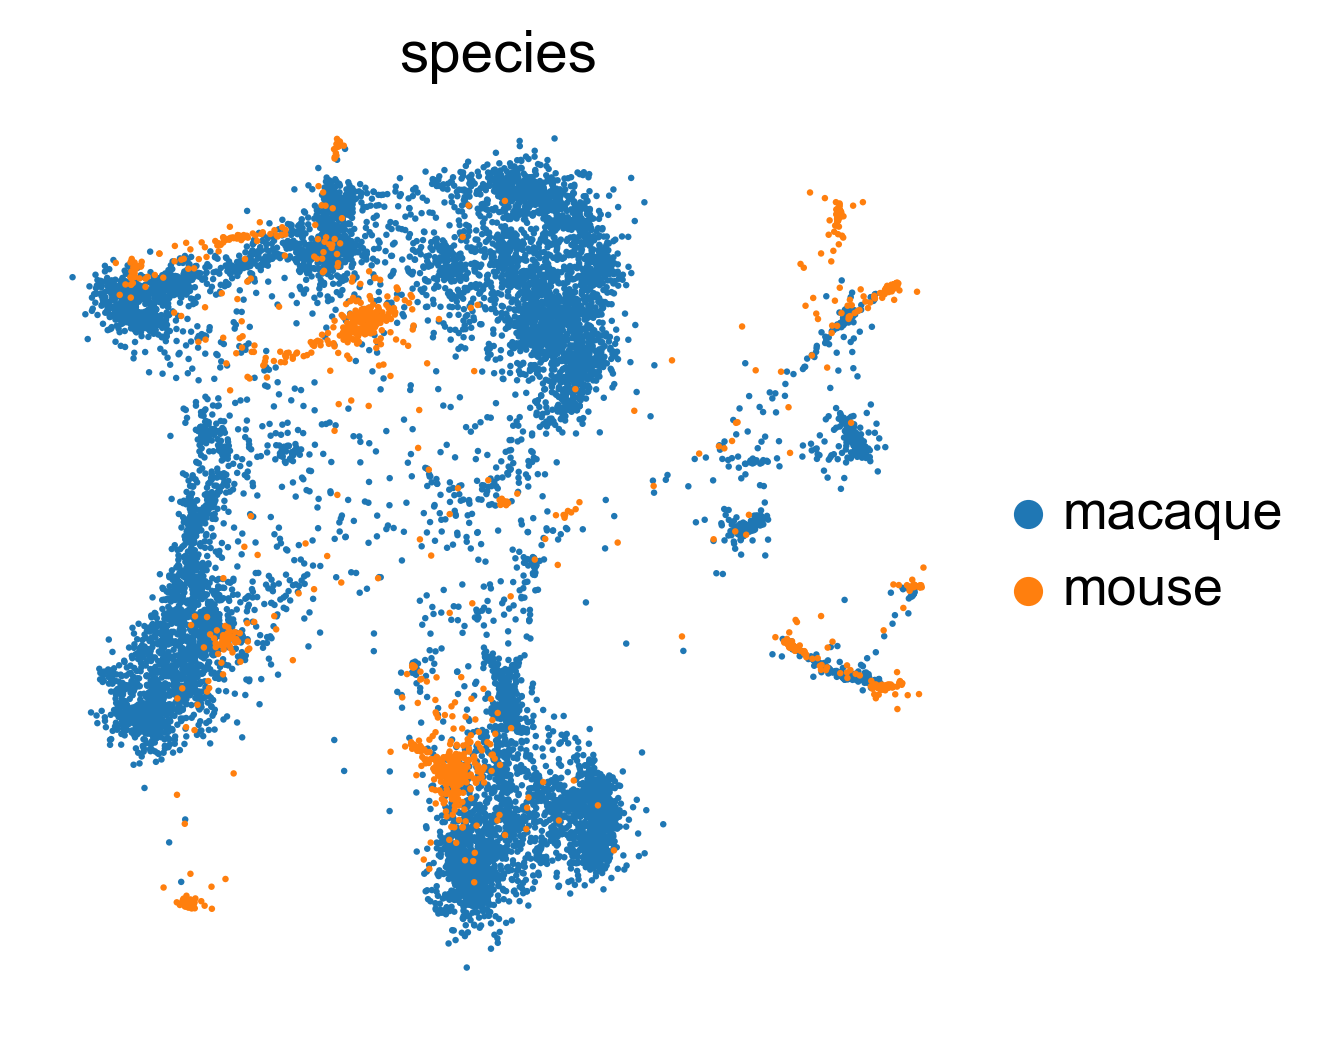

In [73]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["species"],
    frameon=False,
    ncols=1,
)

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


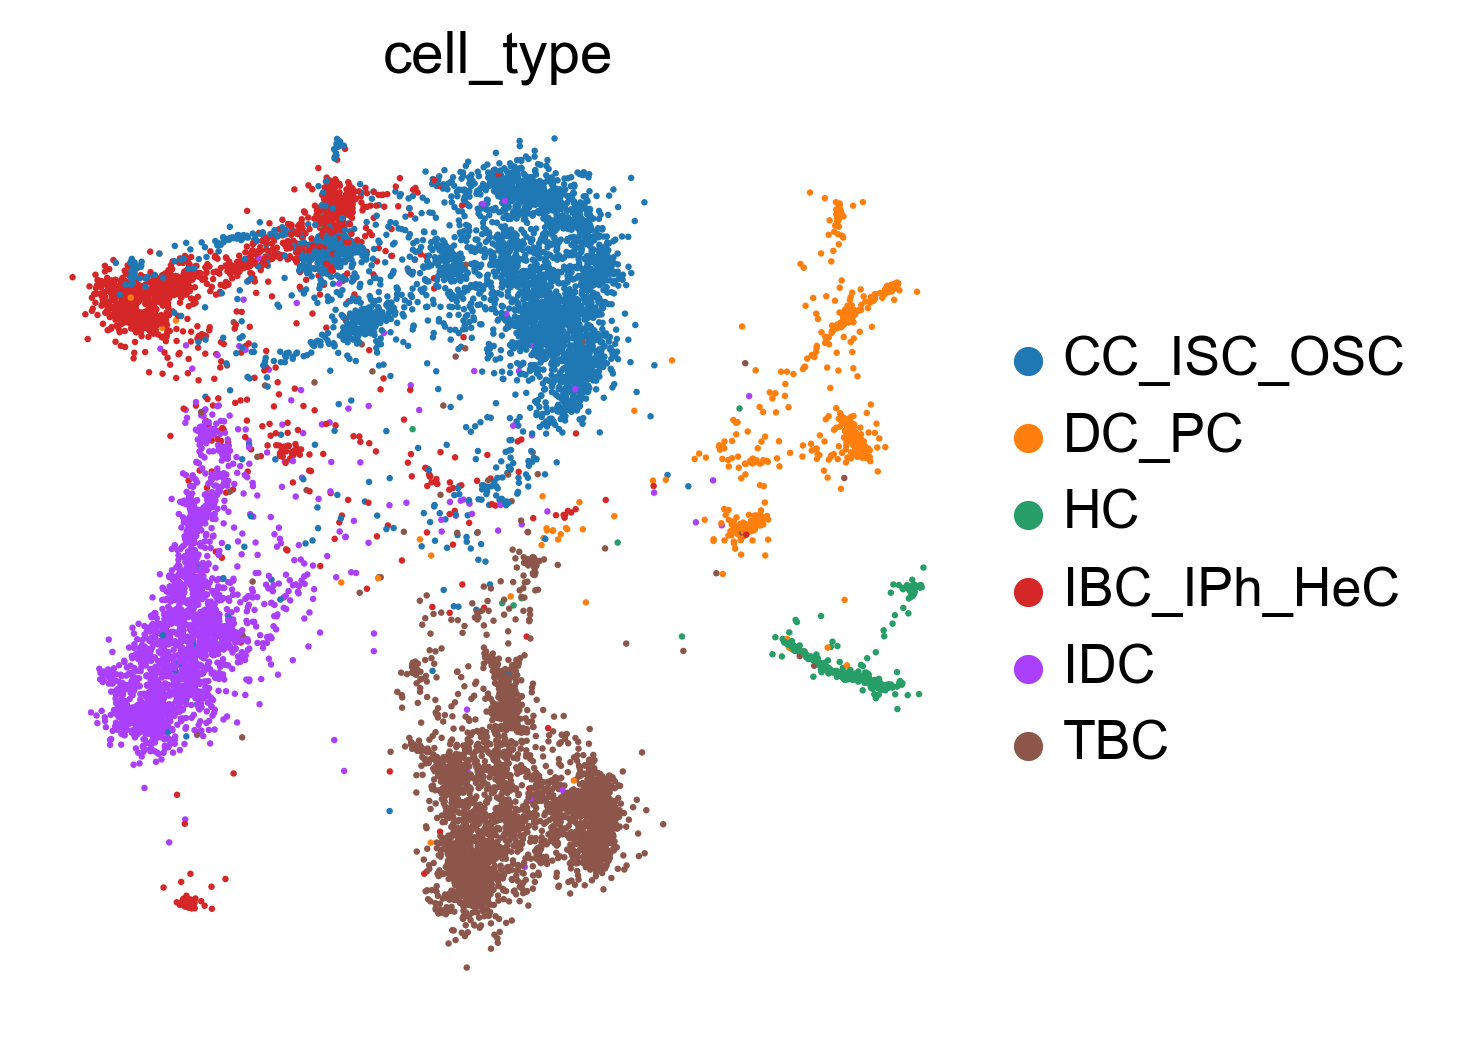

In [74]:
sc.pl.embedding(adata, color="cell_type", frameon=False, basis=SCVI_MDE_KEY)

In [75]:
SCANVI_CELLTYPE_KEY = "celltype_scanvi"

adata.obs[SCANVI_CELLTYPE_KEY] = "Unknown"
ss2_mask = adata.obs["species"] == "mouse"
adata.obs[SCANVI_CELLTYPE_KEY][ss2_mask] = adata.obs.cell_type[ss2_mask].values

C:\Users\Dell\AppData\Local\Temp\ipykernel_35508\2780042011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[SCANVI_CELLTYPE_KEY][ss2_mask] = adata.obs.cell_type[ss2_mask].values


In [76]:
np.unique(adata.obs[SCANVI_CELLTYPE_KEY], return_counts=True)

(array(['CC_ISC_OSC', 'DC_PC', 'HC', 'IBC_IPh_HeC', 'IDC', 'TBC',
        'Unknown'], dtype=object),
 array([  455,   293,   225,   112,    87,   339, 10870], dtype=int64))

In [77]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    scvi_model,
    adata=adata,
    unlabeled_category="Unknown",
    labels_key=SCANVI_CELLTYPE_KEY,
)

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [78]:
scanvi_model.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
G:\Miniconda3\envs\scvi-env\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.


Epoch 1/20:   0%|                                              | 0/20 [00:00<?, ?it/s]

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/20:   5%| | 1/20 [00:04<01:18,  4.12s/it, v_num=1, train_loss_step=670, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 3/20:  10%| | 2/20 [00:08<01:15,  4.19s/it, v_num=1, train_loss_step=658, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 4/20:  15%|▏| 3/20 [00:12<01:12,  4.27s/it, v_num=1, train_loss_step=627, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 5/20:  20%|▏| 4/20 [00:16<01:07,  4.20s/it, v_num=1, train_loss_step=656, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 6/20:  25%|▎| 5/20 [00:21<01:03,  4.22s/it, v_num=1, train_loss_step=637, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 7/20:  30%|▎| 6/20 [00:25<00:58,  4.17s/it, v_num=1, train_loss_step=632, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 8/20:  35%|▎| 7/20 [00:29<00:54,  4.19s/it, v_num=1, train_loss_step=690, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 9/20:  40%|▍| 8/20 [00:33<00:50,  4.23s/it, v_num=1, train_loss_step=599, train_

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 10/20:  45%|▍| 9/20 [00:37<00:46,  4.18s/it, v_num=1, train_loss_step=636, train

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 11/20:  50%|▌| 10/20 [00:41<00:41,  4.17s/it, v_num=1, train_loss_step=658, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 12/20:  55%|▌| 11/20 [00:46<00:37,  4.17s/it, v_num=1, train_loss_step=756, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 13/20:  60%|▌| 12/20 [00:50<00:33,  4.13s/it, v_num=1, train_loss_step=641, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 14/20:  65%|▋| 13/20 [00:54<00:28,  4.10s/it, v_num=1, train_loss_step=644, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 15/20:  70%|▋| 14/20 [00:58<00:24,  4.09s/it, v_num=1, train_loss_step=678, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 16/20:  75%|▊| 15/20 [01:02<00:20,  4.10s/it, v_num=1, train_loss_step=642, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 17/20:  80%|▊| 16/20 [01:06<00:16,  4.10s/it, v_num=1, train_loss_step=650, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 18/20:  85%|▊| 17/20 [01:10<00:12,  4.11s/it, v_num=1, train_loss_step=662, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 19/20:  90%|▉| 18/20 [01:14<00:08,  4.13s/it, v_num=1, train_loss_step=805, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 20/20:  95%|▉| 19/20 [01:19<00:04,  4.18s/it, v_num=1, train_loss_step=633, trai

G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
G:\Miniconda3\envs\scvi-env\lib\site-packages\scvi\module\_scanvae.py:304: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 20/20: 100%|█| 20/20 [01:23<00:00,  4.13s/it, v_num=1, train_loss_step=750, trai

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|█| 20/20 [01:23<00:00,  4.15s/it, v_num=1, train_loss_step=750, trai


In [79]:
SCANVI_LATENT_KEY = "X_scANVI"
SCANVI_PREDICTION_KEY = "C_scANVI"

adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)
adata.obs[SCANVI_PREDICTION_KEY] = scanvi_model.predict(adata)

In [80]:
SCANVI_MDE_KEY = "X_mde_scanvi"
adata.obsm[SCANVI_MDE_KEY] = mde(adata.obsm[SCANVI_LATENT_KEY])

INFO     Using cpu for `pymde.preserve_neighbors`.                                                                 


In [91]:
adata

AnnData object with n_obs × n_vars = 12381 × 2000
    obs: 'CellID', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'cluster', 'cluster2', 'cell_type2', 'cell_type3', 'batch', 'cell_type', 'species', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'C_scANVI'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'species_colors', 'cell_type_colors', 'C_scANVI_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', 'X_scVI_mde', 'X_scANVI', 'X_mde_scanvi'
    layers: 'counts'

In [92]:
adata2=adata.copy()

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\_core\anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [93]:
sc.pp.neighbors(adata2,n_neighbors=30,use_rep="X_mde_scanvi")
sc.tl.umap(adata2,min_dist=0.6)

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


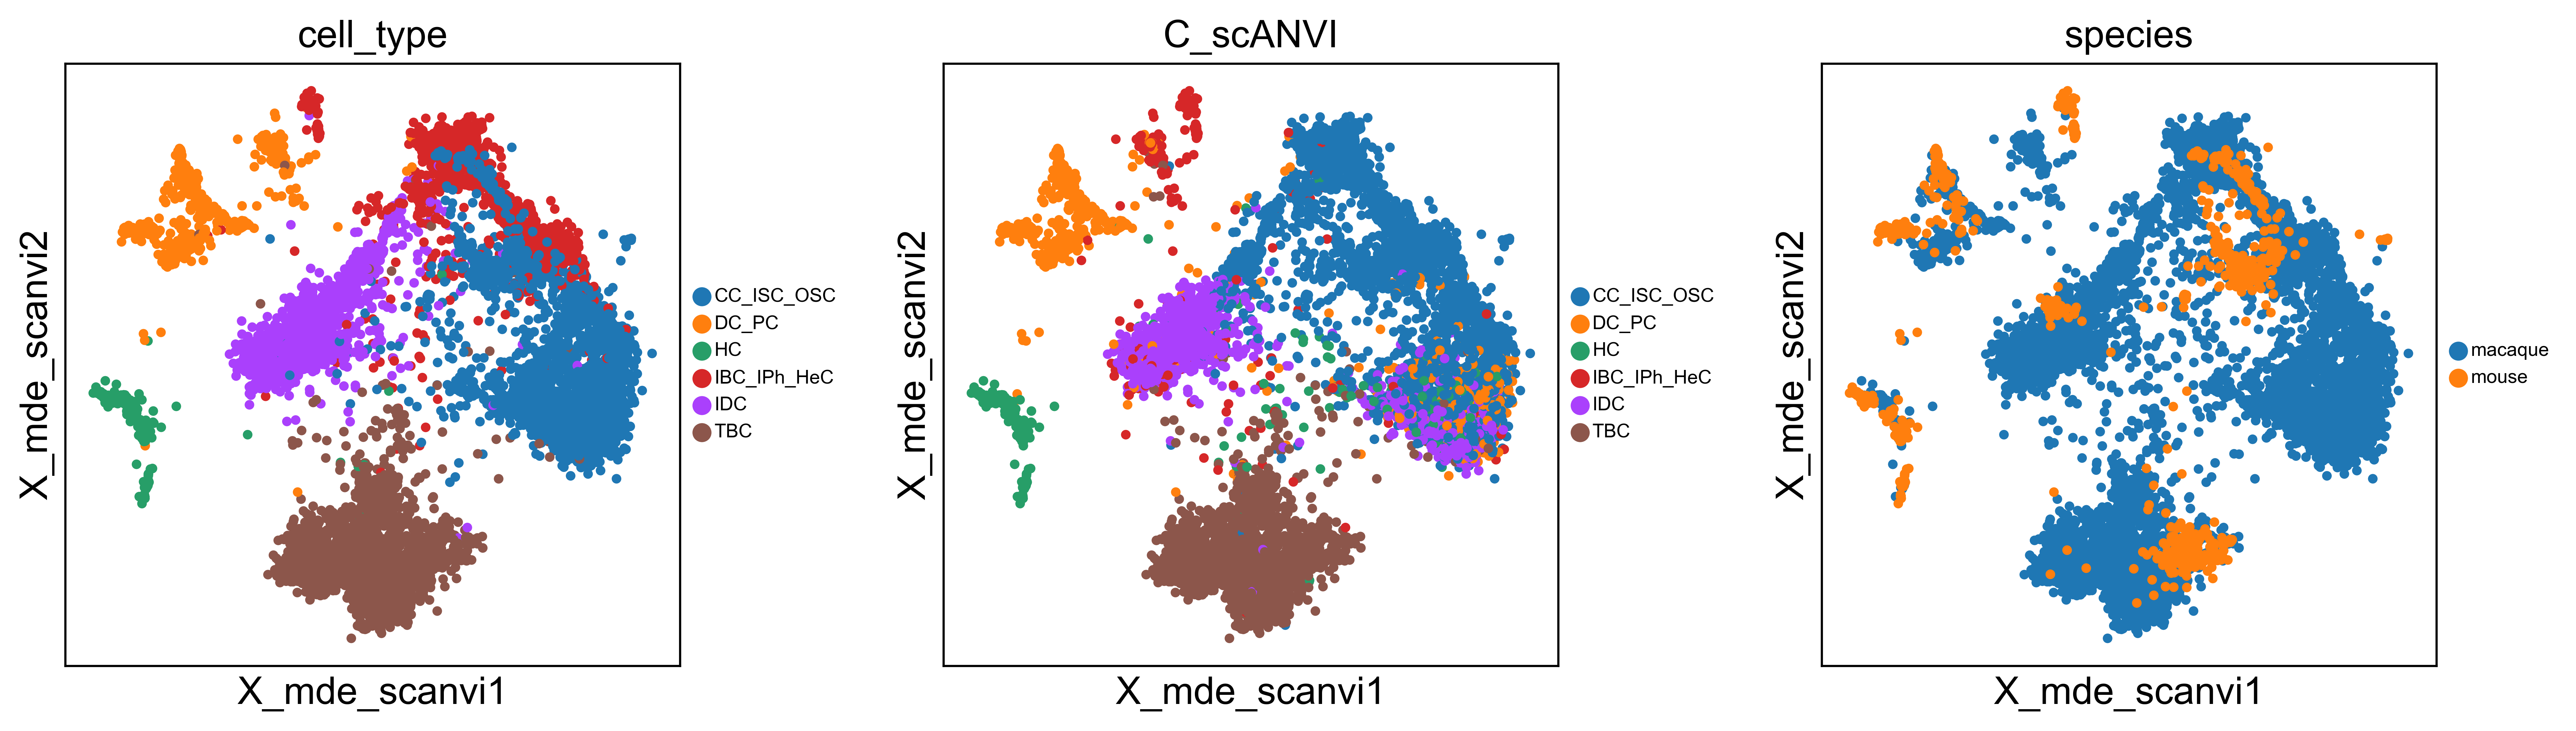

In [94]:
# in order to make colors matchup
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=300,dpi_save=600)
adata2.obs.C_scANVI = pd.Categorical(
    adata2.obs.C_scANVI.values, categories=adata2.obs.cell_type.cat.categories
)
sc.pl.embedding(
    adata2,
    basis=SCANVI_MDE_KEY,
    color=["cell_type", SCANVI_PREDICTION_KEY,'species'],
    ncols=3,
    palette=adata.uns["cell_type_colors"],wspace=0.3, legend_fontsize=7,size=50,
    frameon=True, save="scANVI_label_transfer_macaque-mouse_coe.pdf"
)

In [95]:
df = adata.obs.groupby(["cell_type", SCANVI_PREDICTION_KEY]).size().unstack(fill_value=0)

In [96]:
conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

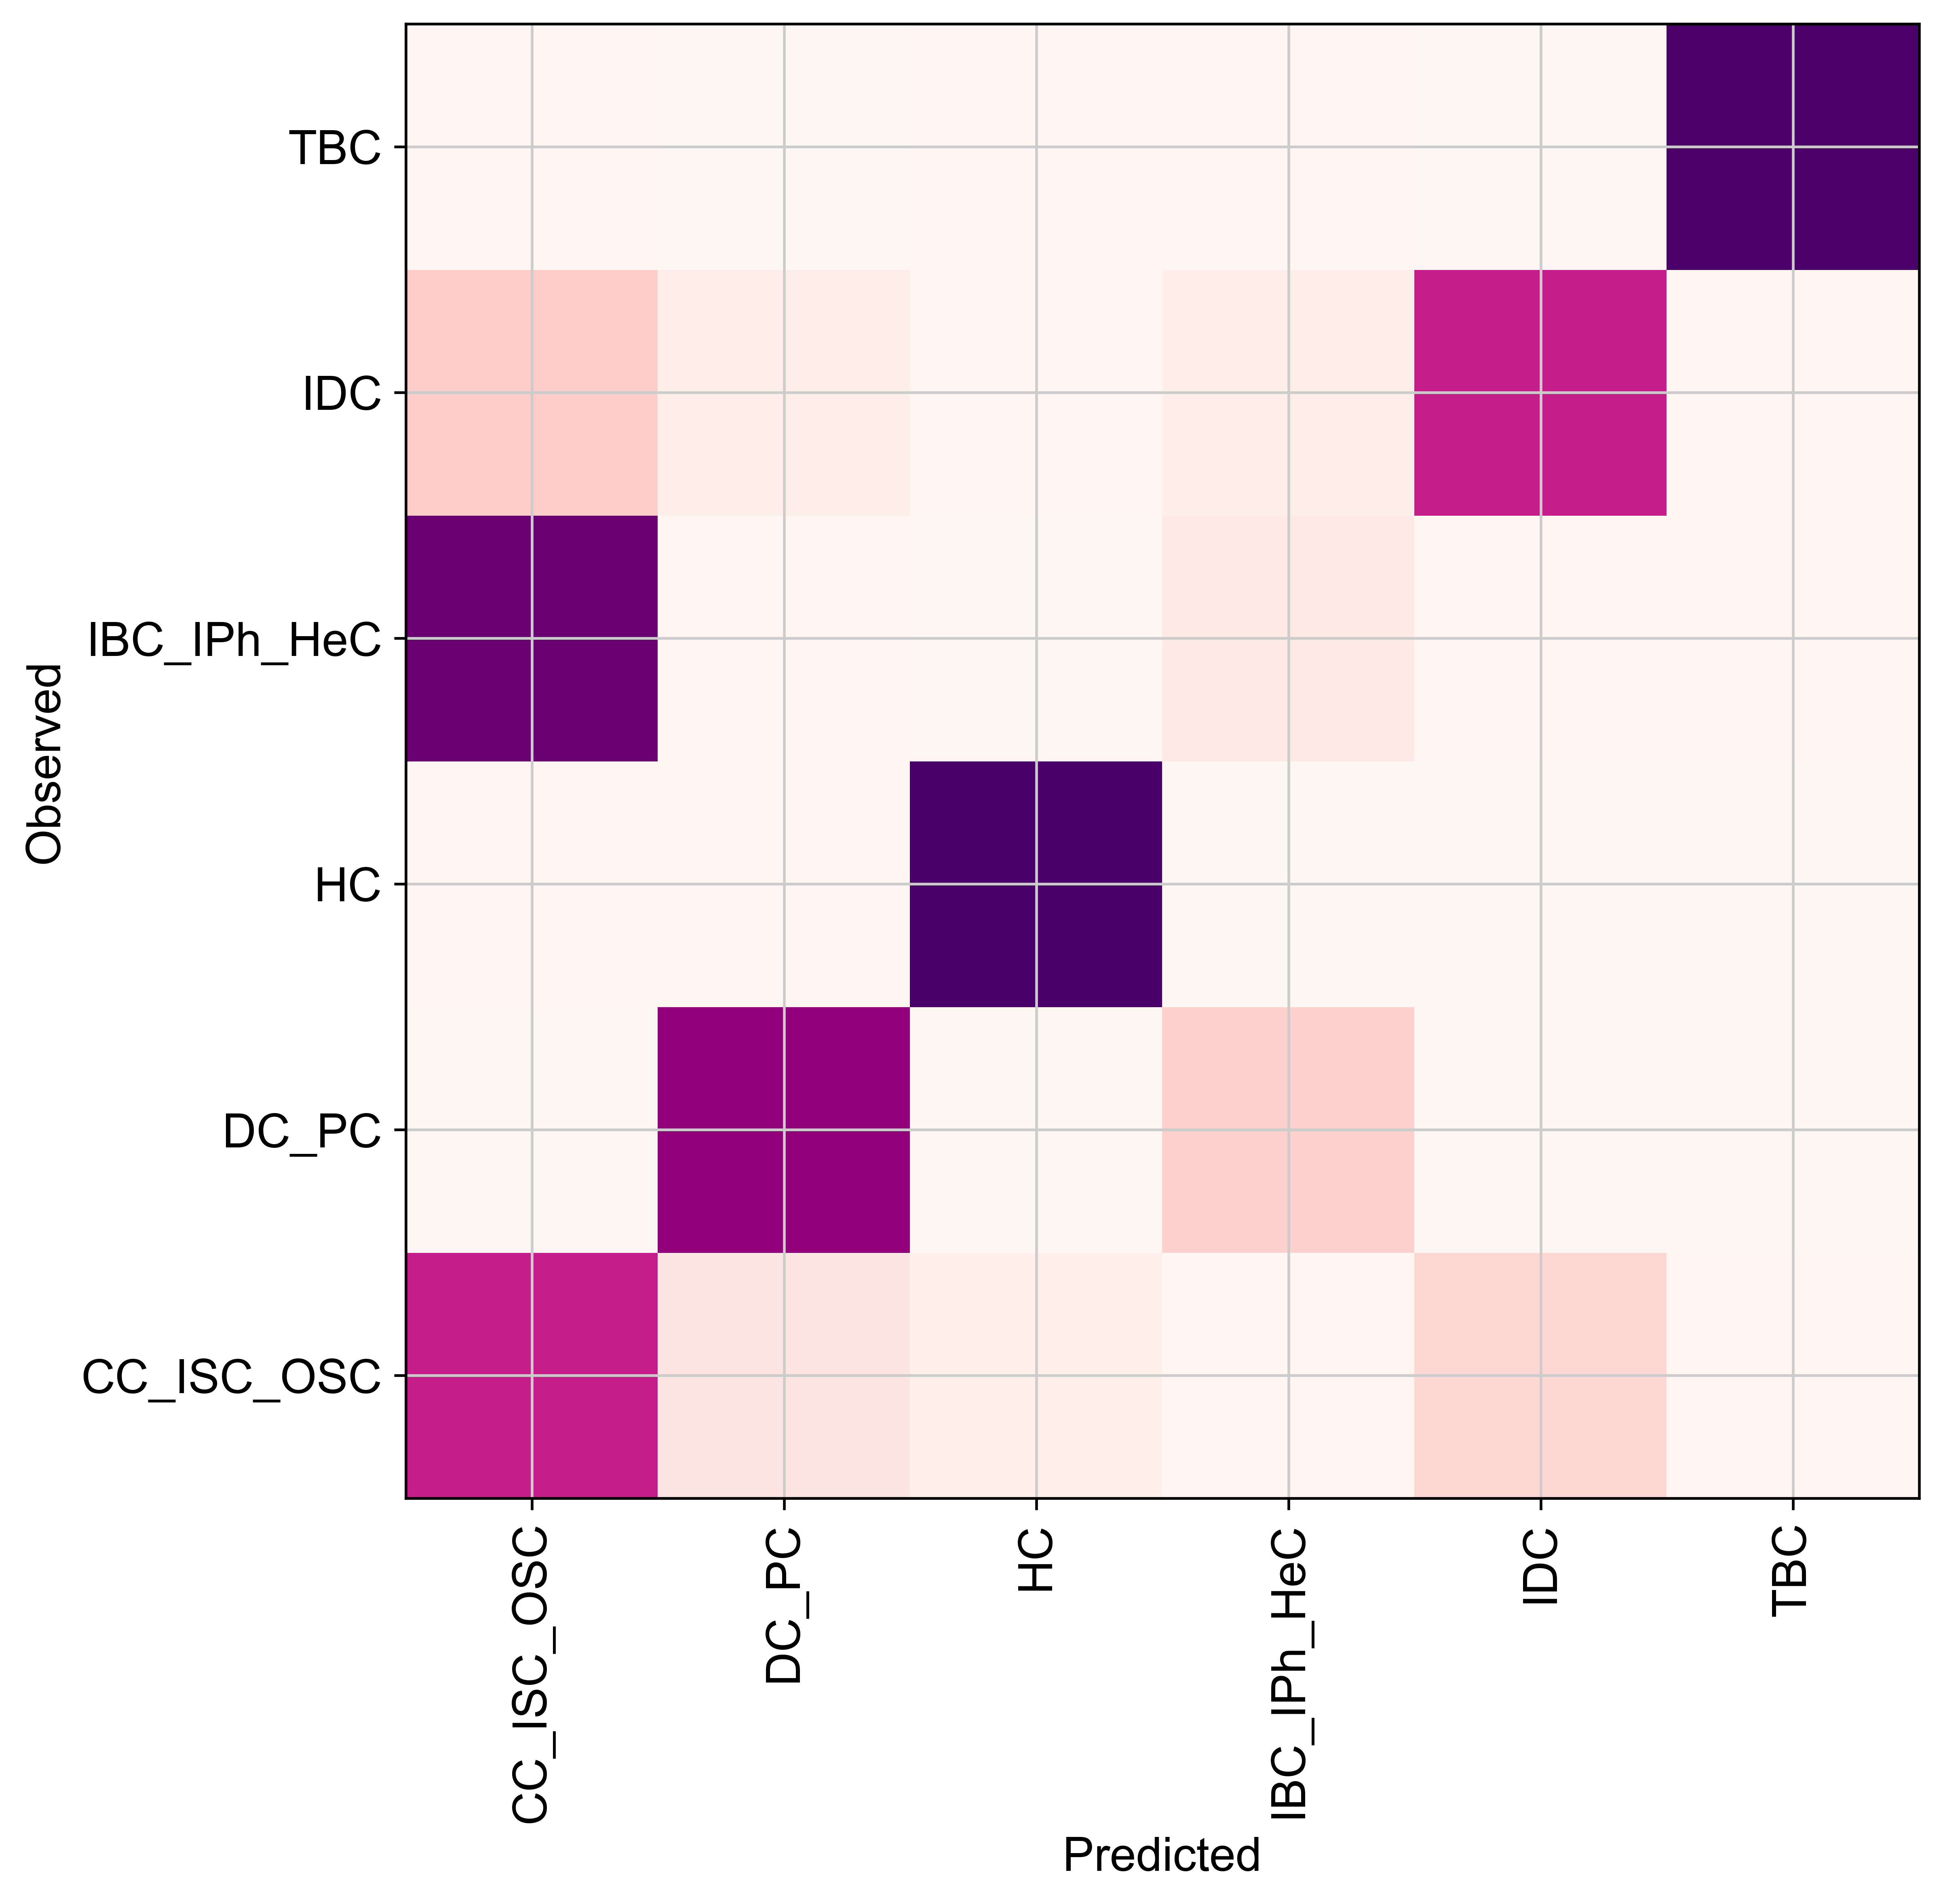

In [98]:
plt.figure(figsize=(8, 8))
_ = plt.pcolor(conf_mat)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.savefig('CORRPLOT_MACAQUE-MOUSE_COE_SCANVI.pdf')

In [25]:
sc.tl.rank_genes_groups(adata_macaque_coe, 'cell_type',method='t-test',corr_method='benjamini-hochberg')

In [110]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
writer = pd.ExcelWriter('data/coe_MACAQUE_DE.xlsx', engine='xlsxwriter')
for cl in adata_macaque_coe.obs.cell_type.cat.categories:
    sc.get.rank_genes_groups_df(adata_macaque_coe,cl,pval_cutoff=0.01,log2fc_min=0.25
                               ).set_index("names").to_excel(writer, 
                                                                     sheet_name=cl)
    
writer.save()

In [26]:
sc.tl.rank_genes_groups(adata_mouse_coe, 'cell_type',method='t-test',corr_method='benjamini-hochberg')

In [112]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
writer = pd.ExcelWriter('data/coe_MOUSE_DE.xlsx', engine='xlsxwriter')
for cl in adata_mouse_coe.obs.cell_type.cat.categories:
    sc.get.rank_genes_groups_df(adata_mouse_coe,cl,pval_cutoff=0.01,log2fc_min=0.25
                               ).set_index("names").to_excel(writer, 
                                                                     sheet_name=cl)
    
writer.save()

In [27]:
sc.pp.normalize_total(adata_mouse_coe)
sc.pp.log1p(adata_mouse_coe)

In [28]:
sc.pp.normalize_total(adata_macaque_coe)
sc.pp.log1p(adata_macaque_coe)

In [29]:
adata_macaque_coe.obs['cell_type'].cat.reorder_categories(['HC', 
                                                         'DC_PC',
                                                            'IBC_IPh_HeC', 'IDC'
                                                          ,'CC_ISC_OSC','TBC'
                                                           
                                                         ], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17224\1248118605.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_macaque_coe.obs['cell_type'].cat.reorder_categories(['HC',


In [30]:
adata_mouse_coe.obs['cell_type'].cat.reorder_categories(['HC', 
                                                         'DC_PC',
                                                            'IBC_IPh_HeC', 'IDC'
                                                          ,'CC_ISC_OSC','TBC'
                                                           
                                                         ], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17224\3147196286.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_mouse_coe.obs['cell_type'].cat.reorder_categories(['HC',


G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


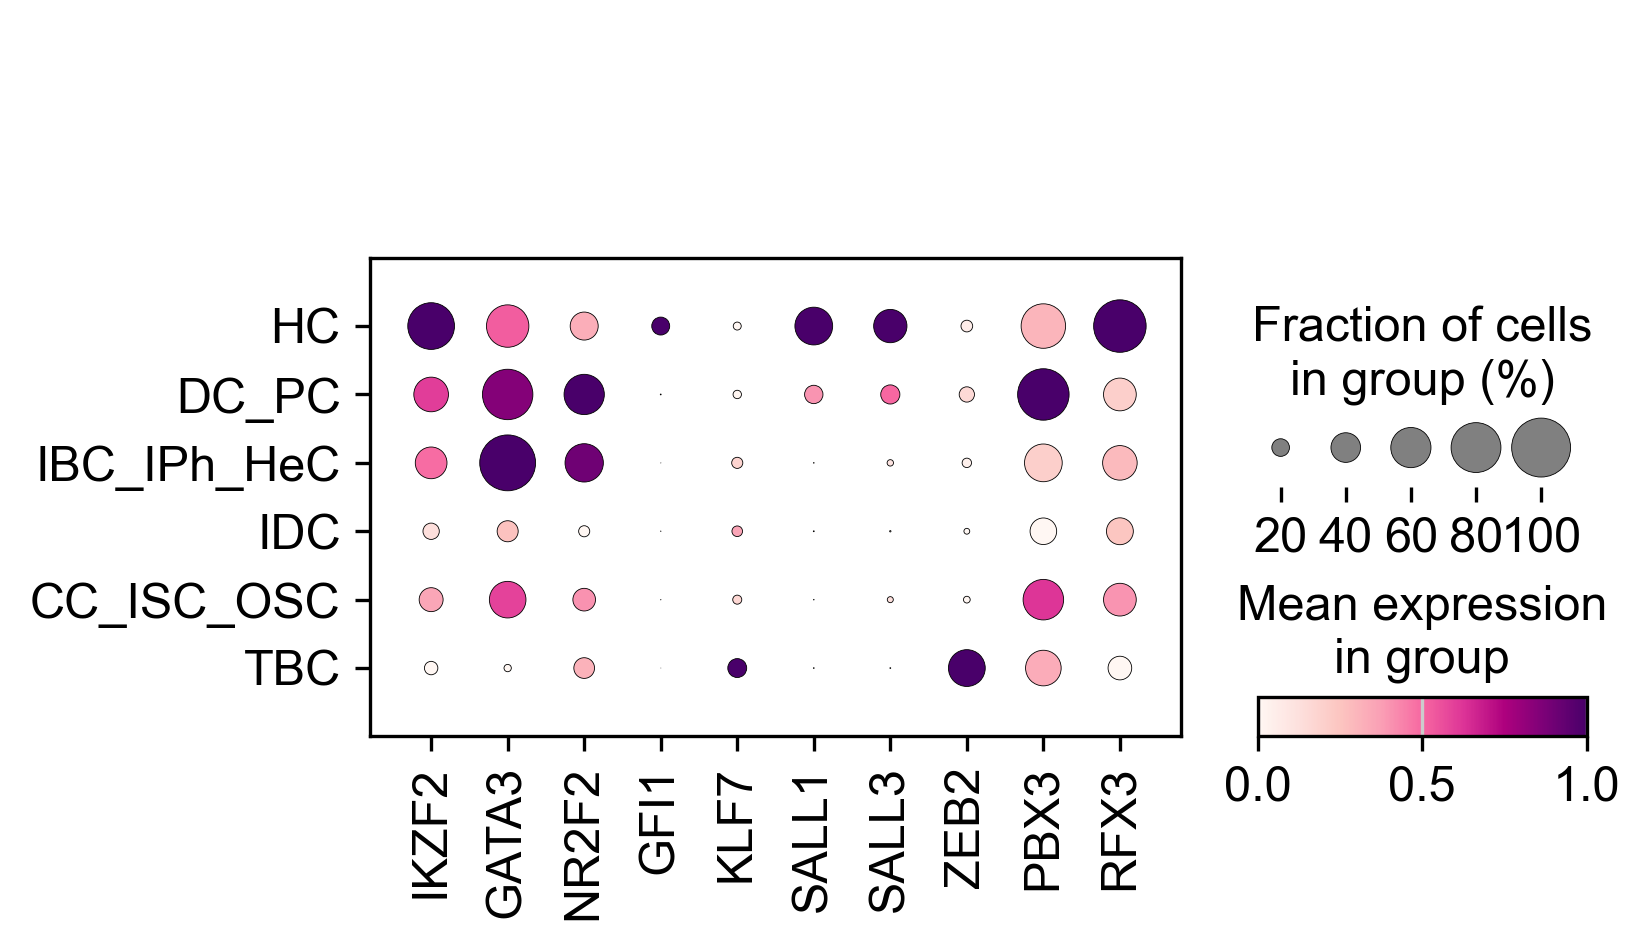

In [36]:
#plot type1 conserved tf
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.dotplot(
    adata_macaque_coe,
    groupby="cell_type",
    var_names=['IKZF2','GATA3', 'NR2F2', 'GFI1','KLF7','SALL1','SALL3','ZEB2','PBX3','RFX3'],
   #dendrogram=True,
    cmap='RdPu',
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
    save="_MACAQUE_COE_conserved_tf.pdf"
)

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


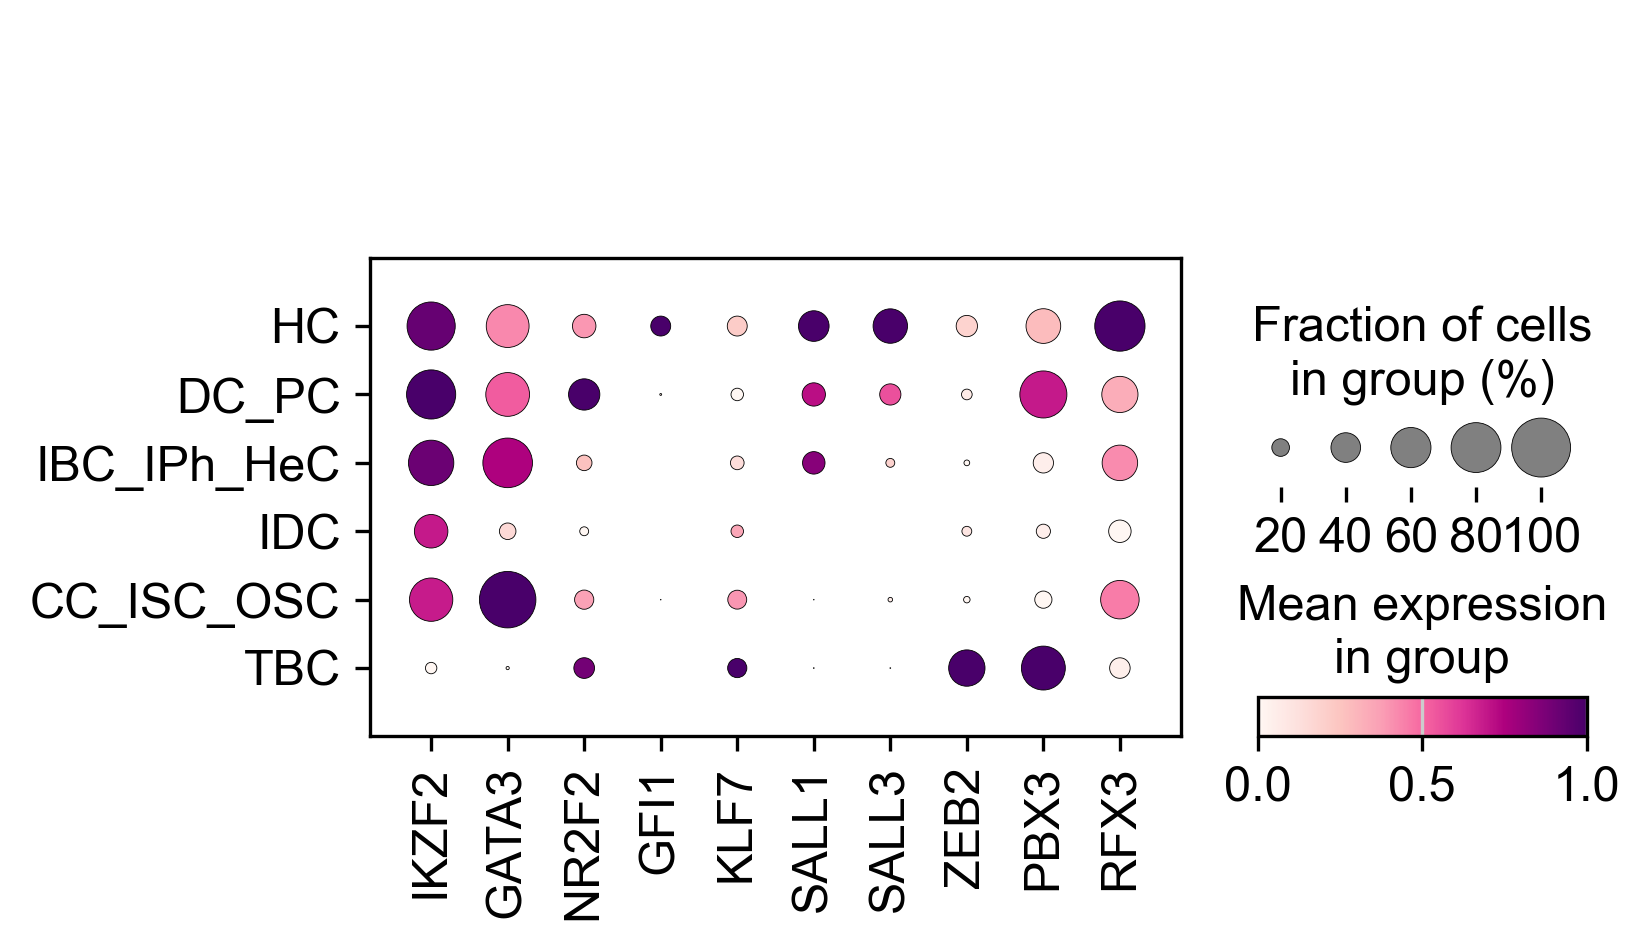

In [37]:
#plot type1 conserved tf
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.dotplot(
    adata_mouse_coe,
    groupby="cell_type",
    var_names=['IKZF2','GATA3','NR2F2','GFI1','KLF7','SALL1','SALL3','ZEB2','PBX3','RFX3'],
   #dendrogram=True,
    cmap='RdPu',
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
    save="_MOUSE_COE_conserved_tf.pdf"
)